# 파생변수 목록
1. total_volume (총매출액)
2. coordinates (geometry to coordintates)
3. Ah, Jum, Ju, Rest (시간대별 유동인구)
4. fail_percent: run_out / ws_cnt * 100 (격자 내 사업체 수 대비 휴폐업 사업장 수)
5. guaranteed_score(사업장 유지년도에 따른 차등 점수 지표)
8. 코로나 이전/이후 매출액 합계 <br> yongsales['BFcorona_sales_volume'] = yongsales.iloc[:,23:34].sum(axis=1) <br> yongsales['AFTcorona_sales_volume'] = yongsales.iloc[:,35:38].sum(axis=1)
9. val_total_pop, val_working_pop

# 아파트상권 (퇴근식당, 강아치 유치원, 비건 베이커리, 드라이브 쓰루카페, <BR> 밀키트, ) 


# 나 - 퇴근식당, 밀키트 
# 예선 - 비건 베이커리, 강아지 유치원
    
* 거의 5000명의 인구가 한격자내에서 사는 아파트에 안에 있는 상가를 노린 아이템 
* 퇴근길에 앱으로 식사 메뉴 주문 후 바로 받아갈수 있게 함 혹은 배달
* 슈퍼푸드


# 드라이브 쓰루 - 드라이브쓰루 세차장 + 커피숍





## [0] Import Library

In [12]:
import math
import numpy as np

In [10]:
math.factorial(45) / (45-6)*6

1.840341859468926e+55

In [1]:
# 한글 깨짐 방지
from IPython.core.display import display
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform
import pandas as pd

f_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

# 마이너스 부호
matplotlib.rcParams['axes.unicode_minus'] = False

# 지수표현 없이 출력하기
pd.options.display.float_format = '{:.2f}'.format
# 각 컬럼 width 최대로
pd.set_option('display.max_colwidth', -1)
# rows 500
pd.set_option('display.max_rows', 500)
# columns
pd.set_option('display.max_columns', 500)
# display_width
pd.set_option('display.width', 1000)

pd.options.display.float_format = '{:.5f}'.format

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


## [1] Load File

<Figure size 432x288 with 0 Axes>

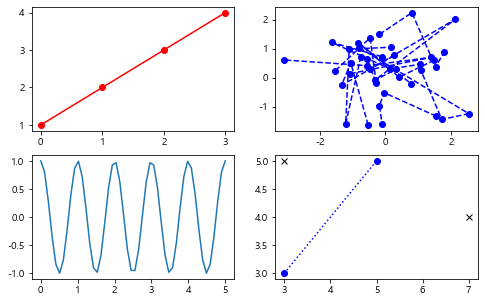

In [18]:
fig = plt.figure()
fig.suptitle('figure sample plots')

fig, ax_lst = plt.subplots(2, 2, figsize=(8,5))

ax_lst[0][0].plot([1,2,3,4], 'ro-')
ax_lst[0][1].plot(np.random.randn(4, 10), np.random.randn(4,10), 'bo--')
ax_lst[1][0].plot(np.linspace(0.0, 5.0), np.cos(2 * np.pi * np.linspace(0.0, 5.0)))
ax_lst[1][1].plot([3,5], [3,5], 'bo:')
ax_lst[1][1].plot([3,7], [5,4], 'kx')
plt.show()

In [2]:
from glob import glob
file_list = glob('../data/yongin/*.geojson')
file_list

['../data/yongin\\10.용인시_건물연면적_격자.geojson',
 '../data/yongin\\11.용인시_법정경계(시군구).geojson',
 '../data/yongin\\12.용인시_법정경계(읍면동).geojson',
 '../data/yongin\\13.용인시_행정경계(읍면동).geojson',
 '../data/yongin\\14.용인시_지적도.geojson',
 '../data/yongin\\15.용인시_용도지역.geojson',
 '../data/yongin\\16.용인시_소상공인_매출정보.geojson',
 '../data/yongin\\3.용인시_인구정보(총인구수)_격자.geojson',
 '../data/yongin\\4.용인시_인구정보(고령)_격자.geojson',
 '../data/yongin\\5.용인시_인구정보(생산가능)_격자.geojson',
 '../data/yongin\\6.용인시_인구정보(유소년)_격자.geojson',
 '../data/yongin\\8.용인시_도로명주소_건물.geojson',
 '../data/yongin\\9.용인시_도로명주소_도로.geojson']

In [3]:
num = []
for i in range(len(file_list)):
    num.append(file_list[i].split('\\')[1].split('.')[0])
num

['10', '11', '12', '13', '14', '15', '16', '3', '4', '5', '6', '8', '9']

In [4]:
import sys
import geopandas as gpd

mod = sys.modules[__name__]
for i in range(len(file_list)):
    setattr(mod, 'yi_{}'.format(num[i]), gpd.read_file(file_list[i]))

In [5]:
file_list2 = glob('../data/yongin/*용인시*.csv')
file_list2

num = []
for i in range(len(file_list2)):
    num.append(file_list2[i].split('\\')[1].split('.')[0])
num

['1', '17', '2', '7']

In [6]:
import sys
for i in range(len(file_list2)):
    setattr(mod, 'yi_{}'.format(num[i]),
            pd.read_csv(file_list2[i], encoding='utf-8'))

### yi_16, yi_17 df 병합 = yong_geometry

In [9]:
yong_geometry = pd.merge(yi_17, yi_16[['gid', 'geometry']],
                     on='gid', how='left')

In [10]:
yong_geometry = gpd.GeoDataFrame(yong_geometry)

In [10]:
yong_geometry.head(1)

,gid,ws_cnt,found_age_1,found_age_2,found_age_3,found_age_4,found_age_5,found_age_6,runout_cnt,smbiz_yn_cnt,rpr_per_gender_m,rpr_per_gender_f,rpr_per_age_bin_10,rpr_per_age_bin_20,rpr_per_age_bin_30to50,rpr_per_age_bin_50over,sme_loan_cnt,sme_loan_y_1,sme_loan_y_2,sme_loan_y_3,sme_loan_y_4,sme_loan_y_5,sme_loan_y_6,sales_est_amt_201703,sales_est_amt_201706,sales_est_amt_201709,sales_est_amt_201712,sales_est_amt_201803,sales_est_amt_201806,sales_est_amt_201809,sales_est_amt_201812,sales_est_amt_201903,sales_est_amt_201906,sales_est_amt_201909,sales_est_amt_201912,sales_est_amt_202003,sales_est_amt_202006,sales_est_amt_202009,age10_ratio,age20_ratio,age30_ratio,age40_ratio,age50_ratio,age60_ratio,age70_ratio,indcd_a_yn,indcd_b_yn,indcd_c_yn,indcd_d_yn,indcd_e_yn,indcd_f_yn,indcd_g_yn,indcd_h_yn,indcd_i_yn,indcd_j_yn,indcd_k_yn,indcd_l_yn,indcd_m_yn,indcd_n_yn,indcd_o_yn,indcd_p_yn,indcd_q_yn,indcd_r_yn,indcd_s_yn,indcd_t_yn,indcd_u_yn,geometry
0,다바67bb99aa,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57,0,199,0.00,0.00,0.00,0.00,100.00,0.00,0.00,NaN,nan,NaN,NaN,nan,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,nan,"MULTIPOLYGON (((127.13712 37.08907, 127.13711 37.09132, 127.13992 37.09133, 127.13993 37.08908, 127.13712 37.08907)))"


### yong_analysis 불러오기

In [13]:
yong_analysis.corrwith(yong_analysis['total_volume'])

ws_cnt            0.83 
smbiz_yn_cnt      0.76 
age10_ratio       0.09 
age20_ratio       0.04 
age30_ratio       -0.01
age40_ratio       0.11 
age50_ratio       0.01 
age60_ratio       -0.02
age70_ratio       0.02 
Ah                0.53 
Jum               0.53 
Ju                0.56 
Rest              0.52 
total_volume      1.00 
guarantee_score   -0.01
fail_percent      0.03 
high_volume       0.24 
total_pop         0.21 
working_pop       0.22 
total_fp          0.54 
age_2030_ratio    0.01 
coffee_counts     0.73 
dtype: float64

In [33]:
# yong_analysis.to_csv('yong_analysis.csv')

In [10]:
yong_analysis = pd.read_csv('yong_analysis.csv', index_col = 0 )

In [27]:
yong_analysis.head(1)

,gid,ws_cnt,smbiz_yn_cnt,age10_ratio,age20_ratio,age30_ratio,age40_ratio,age50_ratio,age60_ratio,age70_ratio,Ah,Jum,Ju,Rest,total_volume,guarantee_score,fail_percent,high_volume,total_pop,working_pop,total_fp,age_2030_ratio,coffee_counts
0,다바67bb99aa,1,1,0.00000,0.00000,0.00000,0.00000,100.00000,0.00000,0.00000,74.97000,61.47000,31.07000,49.48000,256,6.00000,0.00000,256.00000,0.00000,0.00000,216.99000,0.00000,0.00000


### yi_1_gid 불러오기

In [9]:
yi_1_gid = pd.read_csv('yi_1_gid.csv', index_col = 0)

## [2] Preprocessing
##### 분석할 중심 데이터 만들기 - yongsales

### 1. yi_7 df에 시간대별 유동인구 컬럼 생성
- 아침: 8시~11시
- 점심: 12시~15시
- 저녁: 17시~20시
- Rest: 나머지 시간대

In [90]:
col_list = []
for col in yi_7.columns:
    if col.split('_')[0] == 'TMST':
        col_list.append(col)

In [91]:
for i in yi_7.columns:
    yi_7[i] = yi_7[i].astype('float')

In [92]:
#시간대별 새로운 column 생성
yi_7['Ah'] = yi_7['TMST_08'] + yi_7['TMST_09'] + yi_7['TMST_10'] + yi_7['TMST_11']
yi_7['Jum'] = yi_7['TMST_12'] + yi_7['TMST_13'] + yi_7['TMST_14'] + yi_7['TMST_15']
yi_7['Ju'] = yi_7['TMST_17'] + yi_7['TMST_18'] + yi_7['TMST_19'] + yi_7['TMST_20']
yi_7['Rest'] = yi_7[col_list].sum(axis=1) - yi_7['Ah'] - yi_7['Jum'] - yi_7['Ju']

### 3. Geometry(multipolygon) to Coordinates

In [95]:
def multipolygon_to_coordinates(x):
    lon, lat = x[0].exterior.xy
    return [[x, y] for x, y in zip(lon, lat)]

In [96]:
raw_yongsales['coordinates'] = raw_yongsales['geometry'].apply(
    multipolygon_to_coordinates)

# 리스트의 중복되는 마지막 요소 제거
for i in range(len(raw_yongsales['coordinates'])):
    del raw_yongsales['coordinates'][i][-1]

### 4. 그리드 내 위치정보는 시간대별 유동인구별로 가산점

In [97]:
"""Ah_list = []
Jum_list = []
Ju_list = []
Rest_list = []

for i in tqdm_notebook(range(len(yongsales))):
    Ah, Jum, Ju, Rest = 0, 0, 0, 0
    for j in range(len(yi_7_new)):
        if (yongsales['coordinates'][i][0][0] < yi_7_new['lon'][j]) & (yi_7_new['lon'][j] < yongsales['coordinates'][i][2][0]):
            if (yongsales['coordinates'][i][0][1] < yi_7_new['lat'][j]) & (yi_7_new['lat'][j] < yongsales['coordinates'][i][2][1]):
                Ah += yi_7_new['Ah'][j]
                Jum += yi_7_new['Jum'][j]
                Ju += yi_7_new['Ju'][j]
                Rest += yi_7_new['Rest'][j]
            
    Ah_list.append(Ah)
    Jum_list.append(Jum)
    Ju_list.append(Ju)
    Rest_list.append(Rest)

yongsales['Ah'] = Ah_list
yongsales['Jum'] = Jum_list
yongsales['Ju'] = Ju_list
yongsales['Rest'] = Rest_list"""

"Ah_list = []\nJum_list = []\nJu_list = []\nRest_list = []\n\nfor i in tqdm_notebook(range(len(yongsales))):\n    Ah, Jum, Ju, Rest = 0, 0, 0, 0\n    for j in range(len(yi_7_new)):\n        if (yongsales['coordinates'][i][0][0] < yi_7_new['lon'][j]) & (yi_7_new['lon'][j] < yongsales['coordinates'][i][2][0]):\n            if (yongsales['coordinates'][i][0][1] < yi_7_new['lat'][j]) & (yi_7_new['lat'][j] < yongsales['coordinates'][i][2][1]):\n                Ah += yi_7_new['Ah'][j]\n                Jum += yi_7_new['Jum'][j]\n                Ju += yi_7_new['Ju'][j]\n                Rest += yi_7_new['Rest'][j]\n            \n    Ah_list.append(Ah)\n    Jum_list.append(Jum)\n    Ju_list.append(Ju)\n    Rest_list.append(Rest)\n\nyongsales['Ah'] = Ah_list\nyongsales['Jum'] = Jum_list\nyongsales['Ju'] = Ju_list\nyongsales['Rest'] = Rest_list"

In [35]:
"""sales = yongsales.iloc[:,23:38].sum(axis=1)
yongsales['total_volume'] = sales

yongsales.to_csv(yongsales.csv', encoding='utf-8')"""

"sales = yongsales.iloc[:,23:38].sum(axis=1)\nyongsales['total_volume'] = sales\n\nyongsales.to_csv(yongsales.csv', encoding='utf-8')"

## [3] Decision Tree Ensembles
### 1. train_yi 데이터 만들기

In [12]:
yongsales

,Unnamed: 0,gid,ws_cnt,found_age_1,found_age_2,found_age_3,found_age_4,found_age_5,found_age_6,runout_cnt,smbiz_yn_cnt,rpr_per_gender_m,rpr_per_gender_f,rpr_per_age_bin_10,rpr_per_age_bin_20,rpr_per_age_bin_30to50,rpr_per_age_bin_50over,sme_loan_cnt,sme_loan_y_1,sme_loan_y_2,sme_loan_y_3,sme_loan_y_4,sme_loan_y_5,sme_loan_y_6,sales_est_amt_201703,sales_est_amt_201706,sales_est_amt_201709,sales_est_amt_201712,sales_est_amt_201803,sales_est_amt_201806,sales_est_amt_201809,sales_est_amt_201812,sales_est_amt_201903,sales_est_amt_201906,sales_est_amt_201909,sales_est_amt_201912,sales_est_amt_202003,sales_est_amt_202006,sales_est_amt_202009,age10_ratio,age20_ratio,age30_ratio,age40_ratio,age50_ratio,age60_ratio,age70_ratio,indcd_a_yn,indcd_b_yn,indcd_c_yn,indcd_d_yn,indcd_e_yn,indcd_f_yn,indcd_g_yn,indcd_h_yn,indcd_i_yn,indcd_j_yn,indcd_k_yn,indcd_l_yn,indcd_m_yn,indcd_n_yn,indcd_o_yn,indcd_p_yn,indcd_q_yn,indcd_r_yn,indcd_s_yn,indcd_t_yn,indcd_u_yn,geometry,coordinates,Ah,Jum,Ju,Rest,mean_lon,mean_lat,Total_Volume,fail_percent,guarantee_score
0,0,다바67bb99aa,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57,0,199,0.00000,0.00000,0.00000,0.00000,100.00000,0.00000,0.00000,NaN,nan,NaN,NaN,nan,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,nan,"MULTIPOLYGON (((127.1371199261711 37.08907145822322, 127.1371091814905 37.09132498599507, 127.1399222378069 37.09133356063069, 127.1399328992012 37.08908003216216, 127.1371199261711 37.08907145822322)))","[[127.13711992617105, 37.08907145822322], [127.13710918149052, 37.09132498599507], [127.13992223780687, 37.09133356063069], [127.13993289920121, 37.08908003216216]]",74.97000,61.47000,31.07000,49.48000,127.13852,37.09020,256,0.00000,6.00000
1,1,다바68aa99ba,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,32,345,564,888,1187,699,822,716,601,565,502,391,0.17000,3.50000,9.58000,15.83000,14.50000,2.08000,0.00000,NaN,nan,NaN,NaN,nan,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,nan,"MULTIPOLYGON (((127.1399115752264 37.09358708823817, 127.1399009114598 37.09584061498457, 127.1427141355627 37.09584912427786, 127.1427247160244 37.09359559684011, 127.1399115752264 37.09358708823817)))","[[127.13991157522645, 37.093587088238166], [127.13990091145985, 37.095840614984574], [127.1427141355627, 37.09584912427786], [127.14272471602445, 37.09359559684011]]",514.30000,596.30000,403.66000,444.72000,127.14131,37.09472,7312,0.00000,4.00000
2,2,다바68aa99bb,5,0,1,0,0,0,4,0,3,4,1,0,0,3,2,2,1,0,0,0,0,1,1682,2016,2029,2147,1627,1876,2062,2388,2610,3469,3012,3377,2458,3648,3065,0.16000,2.66000,13.79000,21.39000,13.11000,2.16000,2.55000,NaN,nan,Y,NaN,nan,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,nan,"MULTIPOLYGON (((127.1399009114598 37.09584061498457, 127.1398902465069 37.09809414086989, 127.1427035539239 37.09810265085455, 127.1427141355627 37.09584912427786, 127.1399009114598 37.09584061498457)))","[[127.13990091145985, 37.095840614984574], [127.13989024650691, 37.09809414086989], [127.14270355392388, 37.09810265085455], [127.1427141355627, 37.09584912427786]]",182.42000,211.31000,140.92000,156.78000,127.14130,37.09697,37466,0.00000,5.20000
3,3,다바68ab99ba,3,0,0,1,0,2,0,0,3,0,3,0,0,3,0,0,0,0,0,0,0,0,553,475,534,351,456,556,814,860,465,602,495,933,613,862,598,0.02000,2.05000,8.71000,17.07000,31.41000,4.34000,0.24000,NaN,nan,NaN,NaN,nan,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,nan,"MULTIPOLYGON (((127.1427247160244 37.09359559684011, 127.1427141355627 37.09584912427786, 127.1455273608426 37.09585756683526, 127.1455378579994 37.09360403871161, 127.1427247160244 37.09359559684011)))","[[127.14272471602445, 37.09359559684011], [127.1427141355627, 37.09584912427786], [127.14552736084264, 37.095857566835264], [127.14553785799937, 37.09360403871161]]",4598.08000,5275.67000,3547.02000,3982.27000,127.14413,37.09473,9167,0.00000,4.33333
4,4,다바68ba99ab,16,0,1,2,3,2,8,0,13,8,8,0,1,11,4,3,0,1,1,1,0,0,2563,4032,4905,5499,4656,5983,6687,5795,4834,6117,5642,501

In [29]:
yongsales = pd.read_csv('yongsales.csv')

In [41]:
yongsales.iloc[:,23:34].sum(axis=1)

0       0    
1       4537 
2       21907
3       5666 
4       51071
        ...  
2252    151  
2253    407  
2254    11508
2255    187  
2256    2670 
Length: 2257, dtype: int64

In [32]:
yongsales.head(1)

,Unnamed: 0,gid,ws_cnt,found_age_1,found_age_2,found_age_3,found_age_4,found_age_5,found_age_6,runout_cnt,smbiz_yn_cnt,rpr_per_gender_m,rpr_per_gender_f,rpr_per_age_bin_10,rpr_per_age_bin_20,rpr_per_age_bin_30to50,rpr_per_age_bin_50over,sme_loan_cnt,sme_loan_y_1,sme_loan_y_2,sme_loan_y_3,sme_loan_y_4,sme_loan_y_5,sme_loan_y_6,sales_est_amt_201703,sales_est_amt_201706,sales_est_amt_201709,sales_est_amt_201712,sales_est_amt_201803,sales_est_amt_201806,sales_est_amt_201809,sales_est_amt_201812,sales_est_amt_201903,sales_est_amt_201906,sales_est_amt_201909,sales_est_amt_201912,sales_est_amt_202003,sales_est_amt_202006,sales_est_amt_202009,age10_ratio,age20_ratio,age30_ratio,age40_ratio,age50_ratio,age60_ratio,age70_ratio,indcd_a_yn,indcd_b_yn,indcd_c_yn,indcd_d_yn,indcd_e_yn,indcd_f_yn,indcd_g_yn,indcd_h_yn,indcd_i_yn,indcd_j_yn,indcd_k_yn,indcd_l_yn,indcd_m_yn,indcd_n_yn,indcd_o_yn,indcd_p_yn,indcd_q_yn,indcd_r_yn,indcd_s_yn,indcd_t_yn,indcd_u_yn,geometry,coordinates,Ah,Jum,Ju,Rest,mean_lon,mean_lat,Total_Volume,fail_percent,guarantee_score
0,0,다바67bb99aa,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57,0,199,0.00000,0.00000,0.00000,0.00000,100.00000,0.00000,0.00000,NaN,nan,NaN,NaN,nan,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,nan,"MULTIPOLYGON (((127.1371199261711 37.08907145822322, 127.1371091814905 37.09132498599507, 127.1399222378069 37.09133356063069, 127.1399328992012 37.08908003216216, 127.1371199261711 37.08907145822322)))","[[127.13711992617105, 37.08907145822322], [127.13710918149052, 37.09132498599507], [127.13992223780687, 37.09133356063069], [127.13993289920121, 37.08908003216216]]",74.97000,61.47000,31.07000,49.48000,127.13852,37.09020,256,0.00000,6.00000


In [30]:
yong_analysis['volume_class']

,gid,ws_cnt,smbiz_yn_cnt,age10_ratio,age20_ratio,age30_ratio,age40_ratio,age50_ratio,age60_ratio,age70_ratio,Ah,Jum,Ju,Rest,total_volume,guarantee_score,fail_percent,high_volume,total_pop,working_pop,total_fp,age_2030_ratio,coffee_counts
0,다바67bb99aa,1,1,0.00000,0.00000,0.00000,0.00000,100.00000,0.00000,0.00000,74.97000,61.47000,31.07000,49.48000,256,6.00000,0.00000,256.00000,0.00000,0.00000,216.99000,0.00000,0.00000
1,다바68aa99ba,1,0,0.17000,3.50000,9.58000,15.83000,14.50000,2.08000,0.00000,514.30000,596.30000,403.66000,444.72000,7312,4.00000,0.00000,7312.00000,0.00000,0.00000,1958.98000,13.08000,0.00000
2,다바68aa99bb,5,3,0.16000,2.66000,13.79000,21.39000,13.11000,2.16000,2.55000,182.42000,211.31000,140.92000,156.78000,37466,5.20000,0.00000,7493.20000,6.00000,0.00000,691.43000,16.45000,0.00000
3,다바68ab99ba,3,3,0.02000,2.05000,8.71000,17.07000,31.41000,4.34000,0.24000,4598.08000,5275.67000,3547.02000,3982.27000,9167,4.33333,0.00000,3055.66667,48.00000,31.00000,17403.04000,10.76000,0.00000
4,다바68ba99ab,16,13,0.27000,8.60000,19.65000,18.52000,18.85000,3.28000,0.82000,3024.87000,3202.24000,2209.42000,2671.80000,78733,4.87500,0.00000,4920.81250,11.00000,10.00000,11108.33000,28.25000,2.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2252,다사92ab02bb,1,1,0.00000,2.00000,12.10000,48.20000,5.40000,9.00000,6.50000,773.27000,894.07000,655.78000,904.53000,194,4.00000,0.00000,194.00000,31.00000,12.00000,3227.65000,14.10000,0.00000
2253,다사92ab03aa,2,2,0.00000,0.00000,28.57000,4.71000,14.29000,14.29000,23.86000,1282.80000,1481.66000,1085.25000,1506.36000,443,5.50000,0.00000,221.50000,34.00000,21.00000,5356.07000,28.57000,0.00000
2254,다사92ab04ab,1,0,0.00000,3.00000,14.33000,42.40000,21.80000,11.00000,5.67000,175.65000,188.70000,118.93000,225.54000,17590,6.00000,0.00000,17590.00000,7.00000,0.00000,708.82000,17.33000,0.00000
2255,다사92ab05ab,2,1,0.00000,9.88000,33.13000,18.00000,19.75000,2.13000,0.00000,1559.02000,1319.33000,603.98000,1206.30000,844,4.00000,0.00000,422.00000,0.00000,0.00000,4688.63000,43.01000,1.00000


In [99]:
import pandas as pd
yongsales = pd.read_csv('../data/yongin/yongsales.csv', encoding='utf-8')

In [100]:
# 타겟(매출)과 관련된 값들과 지역정보 데이터 삭제
train_yi = yongsales[:]

for col in train_yi.columns:
    if col.split('_')[0] == 'sales':
        del train_yi[col]

del train_yi['gid']
del train_yi['geometry']
del train_yi['coordinates']
del train_yi['sme_loan_cnt']

In [101]:
# 'Y'를 1로 변경
for each in train_yi.columns:
    if each.split('_')[0] == 'indcd':
        train_yi[each] = train_yi[each].replace('Y', 1)

# na값 0으로 채우기
train_yi = train_yi.fillna(0)

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


### 2. RandomForestRegressor

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(
    yong, y, random_state=0)

forest = RandomForestRegressor(random_state=0)
forest.fit(X_train, y_train)

print('훈련 세트 정확도: {:.4f}'.format(forest.score(X_train, y_train)))
print('테스트 세트 정확도: {:.4f}'.format(forest.score(X_test, y_test)))

훈련 세트 정확도: 0.9534
테스트 세트 정확도: 0.8316


#### 2-1. GridSerachCV 활용하여 최적값 찾기

In [13]:
from sklearn import ensemble
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

"""if __name__ == '__main__':
    # Set the parameters by cross-validation
    tuned_parameters = {'n_estimators': range(10,1000,10), 'max_depth': range(1,11)}

    # clf = ensemble.RandomForestRegressor(n_estimators=500, n_jobs=1, verbose=1)
    clf = GridSearchCV(ensemble.RandomForestRegressor(), tuned_parameters, cv=5, n_jobs=-1, verbose=1)
    clf.fit(X_train, y_train)
    print(clf.best_estimator_)"""

"if __name__ == '__main__':\n    # Set the parameters by cross-validation\n    tuned_parameters = {'n_estimators': range(10,1000,10), 'max_depth': range(1,11)}\n\n    # clf = ensemble.RandomForestRegressor(n_estimators=500, n_jobs=1, verbose=1)\n    clf = GridSearchCV(ensemble.RandomForestRegressor(), tuned_parameters, cv=5, n_jobs=-1, verbose=1)\n    clf.fit(X_train, y_train)\n    print(clf.best_estimator_)"

※ 최적값: n_estimators = 360, max_depth = 5

#### 2-2. 최적값을 활용하여 RandomForestRegressor

In [383]:
yong.columns[45].split('_',2)[0]

'indcd'

In [147]:
yong_analysis = pd.read_csv('yong_analysis.csv')

In [22]:
yong = yongsales[:]

In [148]:
yong['Total_pop'] = yong_analysis['total_pop']

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
list = ['sales', 'indcd', 'rpr']

In [24]:
for col in yong.columns:
    if col.split('_',2)[0] in list:
        del yong[col]

In [25]:
yong.drop(['gid', 'Unnamed: 0','geometry','coordinates','mean_lon','mean_lat' ], axis = 1, inplace = True)

C:\Users\USER\Anaconda3\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [30]:
yong.rename(columns={'fail_percent':'Runout_percent'}, inplace =True)

C:\Users\USER\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [31]:
yong.head(1)

,ws_cnt,found_age_1,found_age_2,found_age_3,found_age_4,found_age_5,found_age_6,sme_loan_cnt,sme_loan_y_1,sme_loan_y_2,sme_loan_y_3,sme_loan_y_4,sme_loan_y_5,sme_loan_y_6,age10_ratio,age20_ratio,age30_ratio,age40_ratio,age50_ratio,age60_ratio,age70_ratio,Ah,Jum,Ju,Rest,Total_Volume,Runout_percent,guarantee_score
0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0.00000,0.00000,0.00000,0.00000,100.00000,0.00000,0.00000,74.97000,61.47000,31.07000,49.48000,256,0.00000,6.00000


In [35]:
yong.head(1)

,ws_cnt,found_age_1,found_age_2,found_age_3,found_age_4,found_age_5,found_age_6,sme_loan_cnt,sme_loan_y_1,sme_loan_y_2,sme_loan_y_3,sme_loan_y_4,sme_loan_y_5,sme_loan_y_6,age10_ratio,age20_ratio,age30_ratio,age40_ratio,age50_ratio,age60_ratio,age70_ratio,Ah,Jum,Ju,Rest,Runout_percent,guarantee_score
0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0.00000,0.00000,0.00000,0.00000,100.00000,0.00000,0.00000,74.97000,61.47000,31.07000,49.48000,0.00000,6.00000


In [157]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(yong,y,random_state=0, test_size = 0.1)

In [59]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(random_state= 0, max_depth=3, learning_rate=0.1, n_estimators=35)
GBR.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=35, random_state=0)

In [60]:
GBR.score(X_test, y_test)

0.8615234457779689

In [137]:
import numpy as np
X_len = np.arange(len(X_test[30:50]))

In [152]:
pred = GBR.predict(X_test)

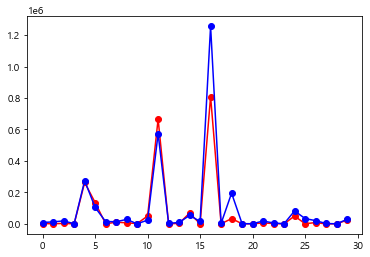

In [153]:
plt.plot(np.arange(len(X_test[30:60])), y_test[30:60],marker ='o', c = 'r')
plt.plot(np.arange(len(X_test[30:60])), pred[30:60], marker ='o', c ='blue')
plt.show()

In [52]:
param_grid={'learning_rate': [0.15,0.1,0.2],
                         'n_estimators': range(10,80,1),'max_depth':[2,3]}

In [53]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

In [54]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(GradientBoostingRegressor(random_state=0), param_grid= param_grid, cv=kfold)

In [55]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=GradientBoostingRegressor(random_state=0),
             param_grid={'learning_rate': [0.15, 0.1, 0.2], 'max_depth': [2, 3],
                         'n_estimators': range(10, 80)})

In [56]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 35}
0.6682568051158653


In [57]:
grid_search.score(X_train, y_train)

0.8766139942847279

In [58]:
grid_search.score(X_test, y_test)

0.8615234457779689

# 선생님 랜덤포레스트 입니다. 보십쇼

In [137]:
list = ['gid','Unnamed: 0','rpr','sales','indcd','mean']

In [138]:
for i in yongsales.columns:
    if i.split('_',2)[0] in list:
        del yongsales[i]

In [134]:
del yongsales['runout_cnt']
del yongsales['sme_loan_cnt']
del yongsales['Total_Volume']

In [142]:
yongsales.rename(columns={'fail_percent':'Runout_percent'},inplace = True)

In [146]:
yongsales.to_csv('RFyong.csv')

In [147]:
RFyong = pd.read_csv('RFyong.csv')

In [149]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(RFyong,yong_analysis['total_volume'],random_state=0,
                                                   test_size=0.1)

In [150]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators=326, random_state=0, max_features='auto')

In [153]:
RF.fit(X_train, y_train)

RandomForestRegressor(n_estimators=326, random_state=0)

In [154]:
RF.score(X_test,y_test)

0.86791382753727

In [188]:
param_grid={'max_features': ["auto"],
                         'n_estimators': range(300,500,2)}

In [189]:
from sklearn.model_selection import GridSearchCV
grid_search_RF = GridSearchCV(RandomForestRegressor(random_state=0), param_grid= param_grid, cv=kfold)

In [190]:
grid_search_RF.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_features': ['sqrt'],
                         'n_estimators': range(300, 500, 2)})

In [191]:
print(grid_search_RF.best_params_)
print(grid_search_RF.best_score_)

{'max_features': 'sqrt', 'n_estimators': 326}
0.6703930475891033


In [156]:
fi = pd.DataFrame(RF.feature_importances_)
fi['names'] = RFyong.columns
fi.rename(columns={0:'count'},inplace = True)
fi.sort_values('count', inplace = True)

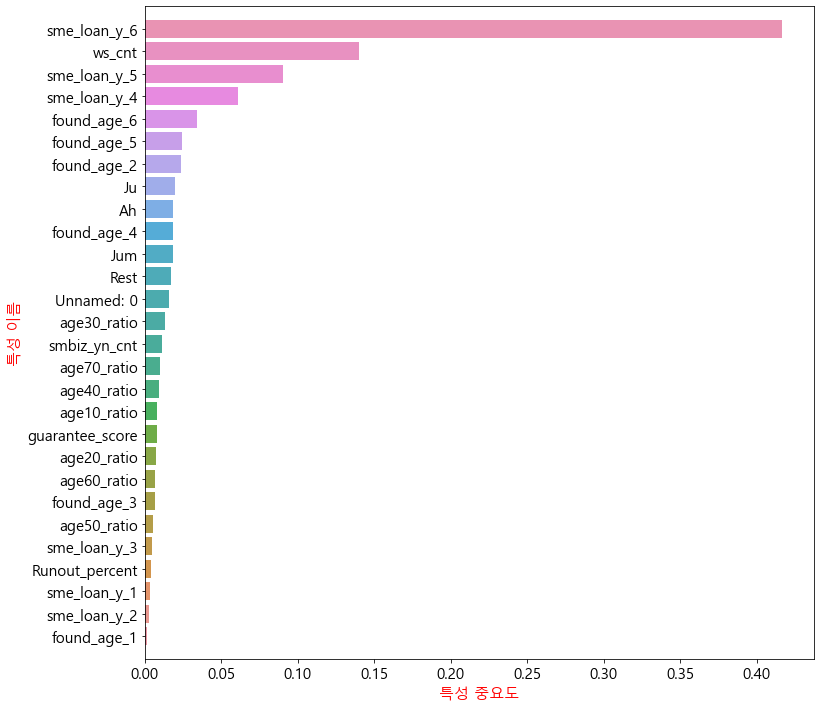

In [157]:
import numpy as np
import seaborn as sns

def plot_feature_importances(model):
    n_features = fi.shape[0]
    plt.figure(figsize=(12,12))
    sns.barplot(x='count', y ='names', data=fi)
    plt.yticks(np.arange(n_features), fi.names, fontsize=15)
    plt.xticks(fontsize = 15)
    plt.xlabel('특성 중요도', fontsize = 15, c = 'red')
    plt.ylabel('특성 이름', fontsize = 15, c = 'red')
    plt.ylim(-1, n_features)
    plt.show()

plot_feature_importances(RF)

# 랜덤포레스트 끝

In [75]:
df_corr = df.corrwith(yong_analysis['total_volume'])

In [80]:
df_rf = RF.feature_importances_

In [92]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_rf = scaler.fit_transform(df_rf.reshape(-1,1))

In [96]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x/ e_x.sum()

In [99]:
df_rf

array([0.01995796, 0.01535469, 0.02978936, 0.17051896, 0.18505403,
       0.57932501])

In [100]:
softmax(df_corr)

sme_loan_y_1   0.11424
sme_loan_y_2   0.11677
sme_loan_y_3   0.12904
sme_loan_y_4   0.14992
sme_loan_y_5   0.15213
sme_loan_y_6   0.15944
total_volume   0.17846
dtype: float64

In [94]:
df_rf.reshape(-1,1)

array([[0.01995796],
       [0.01535469],
       [0.02978936],
       [0.17051896],
       [0.18505403],
       [0.57932501]])

In [111]:
df.sum()

sme_loan_y_1    609      
sme_loan_y_2    588      
sme_loan_y_3    1065     
sme_loan_y_4    2386     
sme_loan_y_5    1346     
sme_loan_y_6    2340     
total_volume    147065249
dtype: int64

In [78]:
df_corr

sme_loan_y_1   0.55396
sme_loan_y_2   0.57582
sme_loan_y_3   0.67573
sme_loan_y_4   0.82570
sme_loan_y_5   0.84036
sme_loan_y_6   0.88728
total_volume   1.00000
dtype: float64

In [79]:
df['total_volume'] = yong_analysis['total_volume']

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [230]:
fi = pd.DataFrame(RF.feature_importances_)
fi['names'] = yong.columns
fi.rename(columns={0:'count'},inplace = True)
fi.sort_values('count', inplace = True)

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51060 missing from current

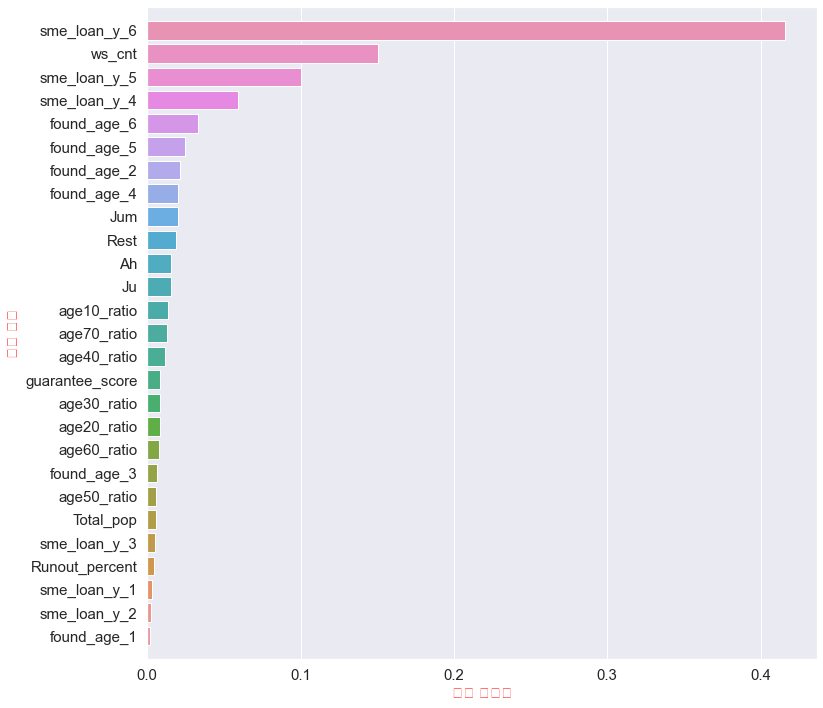

In [234]:
import numpy as np
import seaborn as sns

def plot_feature_importances(model):
    sns.set(font_scale = 3)
    n_features = fi.shape[0]
    plt.figure(figsize=(12,12))
    sns.barplot(x='count', y ='names', data=fi)
    plt.yticks(np.arange(n_features), fi.names, fontsize=15)
    plt.xticks(fontsize = 15)
    plt.xlabel('특성 중요도', fontsize = 15, c = 'red')
    plt.ylabel('특성 이름', fontsize = 15, c = 'red')
    plt.ylim(-1, n_features)
    plt.show()

plot_feature_importances(RF)

In [238]:
yong['total_volume'] = yong_analysis['total_volume']

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [242]:
yong.corrwith(yong['total_volume'])

ws_cnt            0.83290 
found_age_1       0.59086 
found_age_2       0.73820 
found_age_3       0.69447 
found_age_4       0.76893 
found_age_5       0.77883 
found_age_6       0.80660 
sme_loan_y_1      0.55396 
sme_loan_y_2      0.57582 
sme_loan_y_3      0.67573 
sme_loan_y_4      0.82570 
sme_loan_y_5      0.84036 
sme_loan_y_6      0.88728 
age10_ratio       0.09163 
age20_ratio       0.03940 
age30_ratio       -0.01424
age40_ratio       0.11044 
age50_ratio       0.00834 
age60_ratio       -0.01700
age70_ratio       0.02416 
Ah                0.52958 
Jum               0.53448 
Ju                0.55663 
Rest              0.52311 
Runout_percent    0.03291 
guarantee_score   -0.01278
Total_pop         0.21313 
total_pop         0.21313 
total_volume      1.00000 
dtype: float64

In [19]:
y = yong_analysis['total_volume']

In [27]:
X = yong_analysis.drop(['total_volume','gid'], axis =1)

In [17]:
yong_analysis.drop(['smbiz_yn_cnt','age_2030_ratio','total_fp','high_volume'],axis = 1, inplace = True)

In [263]:
X['total_volume'] = yong_analysis['total_volume'] 

In [306]:
a = X.corrwith(X['total_pop'])

In [310]:
yong_analysis.describe()

,ws_cnt,age10_ratio,age20_ratio,age30_ratio,age40_ratio,age50_ratio,age60_ratio,age70_ratio,Ah,Jum,Ju,Rest,total_volume,guarantee_score,fail_percent,high_volume,total_pop,total_fp,coffee_counts
count,2257.00,2257.00,2257.00,2257.00,2257.00,2257.00,2257.00,2257.00,2257.00,2257.00,2257.00,2257.00,2257.00,2257.00,2257.00,2257.00,2257.00,2257.00,2257.00
mean,10.37,0.47,6.53,18.58,26.82,18.37,7.21,3.16,2509.72,2672.05,2844.03,3479.09,65159.61,4.62,2.52,6433.63,398.60,11504.89,0.73
std,25.68,1.72,9.39,15.07,16.40,14.02,9.05,5.90,4403.86,4758.27,5312.06,6237.37,200524.87,1.25,9.67,17573.63,696.15,20584.19,2.17
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,0.00,1.40,10.07,18.14,10.67,2.24,0.19,203.54,214.65,158.46,206.75,1303.00,4.00,0.00,799.00,0.00,795.83,0.00
50%,3.00,0.02,4.20,16.34,25.63,17.76,5.75,1.75,952.35,1012.20,905.24,1153.32,8674.00,4.76,0.00,2716.82,37.00,4011.96,0.00
75%,7.00,0.34,7.78,23.20,33.67,23.02,9.35,3.80,2906.52,3124.35,3319.86,4061.94,44537.00,6.00,0.00,6344.62,472.00,13447.39,1.00
max,325.00,33.33,100.00,100.00,100.00,100.00,100.00,100.00,63686.72,60330.93,73101.26,86754.03,4964721.00,6.00,100.00,399142.00,5526.00,283872.94,30.00


In [311]:
yong_analysis.sort_values('total_pop',ascending = False).head(20)['total_pop'].mean()

3526.2

### 3. GradientBoostingRegressor

In [ ]:
#한울님 코드

## [4] 좋은 격자를 찾기 위한 파생변수 생성

In [ ]:
yongsales.head(1)

In [ ]:
# 격자 내 사업체 수에서 오래 지속한 사업체가 많을수록 보장된 상권
yongsales['guarantee_score'] = ((yongsales['found_age_6'] * 6) + (yongsales['found_age_5'] * 5) +\
                                (yongsales['found_age_4'] * 4) + (yongsales['found_age_3'] * 3) +\
                                (yongsales['found_age_2'] * 2) + (yongsales['found_age_1'] * 1)
                               ) / yongsales['ws_cnt']

In [ ]:
# 휴페업 사업장 수/격자 내 사업체 수
yongsales['fail_percent'] = yongsales['runout_cnt'] / yongsales['ws_cnt'] * 100

In [ ]:
# 격자 내 사업체 수 대비 시간대별 유동인구
yongsales['high_fp_ah'] = yongsales['Ah'] / yongsales['ws_cnt']
yongsales['high_fp_jum'] = yongsales['Jum'] / yongsales['ws_cnt']
yongsales['high_fp_ju'] = yongsales['Ju'] / yongsales['ws_cnt']
yongsales['high_fp_rest'] = yongsales['Rest'] / yongsales['ws_cnt']

In [ ]:
#(yongsales['sme_loan_y_1'] / yongsales['sme_loan_y_1'].mean()).value_counts()

## 상권정보(yi_1, yi_2)

In [ ]:
for i in yi_1[yi_1['표준산업분류코드'].isna()].index:
    yi_1['표준산업분류코드'][i] = 'ZZZ'

In [ ]:
list_indcd = []
for i in range(len(yi_1)):
    if yi_1['표준산업분류코드'][i] == 'ZZZ':
        indcd = yi_1['표준산업분류코드'][i]
    else:
        indcd = yi_1['표준산업분류코드'][i][0]
    list_indcd.append(indcd)

yi_1['indcd'] = list_indcd

In [ ]:
ma = pd.merge(yi_1, yi_2, how = 'left', on = ['대분류코드', '중분류코드', '소분류코드'])
ma.head()

In [ ]:
#round(127.13711992617105 - 127.13710918149052,7)
#위도 1도 = 111.195km
#경도 1도 = 88.804km
#경도 차이가 0.0000107도 = 95.02028cm

* 유동인구 per 매출액 => 유동인구가 전부 소비자라고 할 수는 없으나, 1인당 매출액을 고려할 수는 있을지도? 해당 값이 높으면 고객 흡인률이 좋은 1차 상권
* 유동인구가 아닌 해당 격자의 인구수를 구할 수 있으면 => 소비성향이 높고 구매력이 왕성한 연령층의 소비자가 다수 존재 하는 곳 
<br><br>

### 총인구수

In [ ]:
notna_yi_3 = yi_3[:]

In [ ]:
notna_yi_3['coordinates'] = notna_yi_3['geometry'].apply(
    multipolygon_to_coordinates)

In [ ]:
for i in range(len(notna_yi_3['coordinates'])):
    del notna_yi_3['coordinates'][i][-1]

In [ ]:
notna_yi_3['coordinates'][0]

In [ ]:
notna_yi_3 = notna_yi_3[notna_yi_3.val.notna() & notna_yi_3.val != 0]
notna_yi_3.reset_index(inplace=True, drop=True)

In [ ]:
notna_yi_3

In [ ]:
#coordinates 평균
sum_lon_list = []
sum_lat_list = []

for i in range(len(notna_yi_3)):
    sum_lon, sum_lat = 0, 0

    for j in range(4):
        sum_lon += notna_yi_3['coordinates'][i][j][0]
        sum_lat += notna_yi_3['coordinates'][i][j][1]

    sum_lon /= 4
    sum_lat /= 4
    sum_lon_list.append(sum_lon)
    sum_lat_list.append(sum_lat)

In [106]:
notna_yi_3['mean_lat'] = sum_lat_list
notna_yi_3['mean_lon'] = sum_lon_list

In [107]:
notna_yi_3.head()

,gid,val,geometry,coordinates,mean_lat,mean_lon
0,다바665993,8.000,"MULTIPOLYGON (((127.12304 37.09173, 127.12304 37.09263, 127.12416 37.09264, 127.12417 37.09174, 127.12304 37.09173)))","[[127.123041685653, 37.09173181668392], [127.12303722076226, 37.09263322605671], [127.12416246070292, 37.09263679754136], [127.12416691226666, 37.09173538805251]]",37.092,127.124
1,다바666992,9.000,"MULTIPOLYGON (((127.12417 37.09083, 127.12417 37.09174, 127.12529 37.09174, 127.12530 37.09084, 127.12417 37.09083)))","[[127.12417136363231, 37.090833978425835], [127.12416691226666, 37.09173538805251], [127.12529213907837, 37.091738948745004], [127.12529657711761, 37.09083753900261]]",37.091,127.125
2,다바666993,7.000,"MULTIPOLYGON (((127.12417 37.09174, 127.12416 37.09264, 127.12529 37.09264, 127.12529 37.09174, 127.12417 37.09174)))","[[127.12416691226666, 37.09173538805251], [127.12416246070292, 37.09263679754136], [127.12528770084162, 37.09264035834958], [127.12529213907837, 37.091738948745004]]",37.092,127.125
3,다바667991,12.000,"MULTIPOLYGON (((127.12530 37.08994, 127.12530 37.09084, 127.12642 37.09084, 127.12643 37.08994, 127.12530 37.08994)))","[[127.12530101495938, 37.08993612912241], [127.12529657711761, 37.09083753900261], [127.12642179080036, 37.09084108890364], [127.1264262153163, 37.08993967890806]]",37.090,127.126
4,다바667992,27.000,"MULTIPOLYGON (((127.12530 37.09084, 127.12529 37.09174, 127.12642 37.09174, 127.12642 37.09084, 127.12530 37.09084)))","[[127.12529657711761, 37.09083753900261], [127.12529213907837, 37.091738948745004], [127.12641736608755, 37.09174249876141], [127.12642179080036, 37.09084108890364]]",37.091,127.126


In [108]:
pop = 0
pop_list = []

for i in range(len(raw_yongsales)):
    pop = 0
    for j in range(len(notna_yi_3)):
        if (raw_yongsales['coordinates'][i][0][0] < notna_yi_3['mean_lon'][j]) & (notna_yi_3['mean_lon'][j] < raw_yongsales['coordinates'][i][2][0]):
            if (raw_yongsales['coordinates'][i][0][1] < notna_yi_3['mean_lat'][j]) & (notna_yi_3['mean_lat'][j] < raw_yongsales['coordinates'][i][2][1]):
                pop += notna_yi_3.val[j]
    pop_list.append(pop)

In [125]:
yongsales['total_pop'] = pop_list

### 생산가능인구수

In [112]:
del yongsales['Unnamed: 0']

In [115]:
notna_yi_5 = yi_5[:]

In [116]:
notna_yi_5['coordinates'] = notna_yi_5['geometry'].apply(
    multipolygon_to_coordinates)

C:\Users\USER\Anaconda3\lib\site-packages\geopandas\geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [117]:
for i in range(len(notna_yi_5['coordinates'])):
    del notna_yi_5['coordinates'][i][-1]

In [118]:
notna_yi_5 = notna_yi_5[notna_yi_5.val.notna() & notna_yi_5.val != 0]
notna_yi_5.reset_index(inplace=True, drop=True)

In [119]:
notna_yi_5.head(3)

,gid,val,geometry,coordinates
0,다바666992,6.000,"MULTIPOLYGON (((127.12417 37.09083, 127.12417 37.09174, 127.12529 37.09174, 127.12530 37.09084, 127.12417 37.09083)))","[[127.12417136363231, 37.090833978425835], [127.12416691226666, 37.09173538805251], [127.12529213907837, 37.091738948745004], [127.12529657711761, 37.09083753900261]]"
1,다바666993,6.000,"MULTIPOLYGON (((127.12417 37.09174, 127.12416 37.09264, 127.12529 37.09264, 127.12529 37.09174, 127.12417 37.09174)))","[[127.12416691226666, 37.09173538805251], [127.12416246070292, 37.09263679754136], [127.12528770084162, 37.09264035834958], [127.12529213907837, 37.091738948745004]]"
2,다바667991,11.000,"MULTIPOLYGON (((127.12530 37.08994, 127.12530 37.09084, 127.12642 37.09084, 127.12643 37.08994, 127.12530 37.08994)))","[[127.12530101495938, 37.08993612912241], [127.12529657711761, 37.09083753900261], [127.12642179080036, 37.09084108890364], [127.1264262153163, 37.08993967890806]]"


In [120]:
#coordinates 평균
sum_lon_list = []
sum_lat_list = []

for i in range(len(notna_yi_5)):
    sum_lon, sum_lat = 0, 0

    for j in range(4):
        sum_lon += notna_yi_5['coordinates'][i][j][0]
        sum_lat += notna_yi_5['coordinates'][i][j][1]

    sum_lon /= 4
    sum_lat /= 4
    sum_lon_list.append(sum_lon)
    sum_lat_list.append(sum_lat)

In [121]:
notna_yi_5['mean_lat'] = sum_lat_list
notna_yi_5['mean_lon'] = sum_lon_list

In [122]:
notna_yi_5.head(3)

,gid,val,geometry,coordinates,mean_lat,mean_lon
0,다바666992,6.000,"MULTIPOLYGON (((127.12417 37.09083, 127.12417 37.09174, 127.12529 37.09174, 127.12530 37.09084, 127.12417 37.09083)))","[[127.12417136363231, 37.090833978425835], [127.12416691226666, 37.09173538805251], [127.12529213907837, 37.091738948745004], [127.12529657711761, 37.09083753900261]]",37.091,127.125
1,다바666993,6.000,"MULTIPOLYGON (((127.12417 37.09174, 127.12416 37.09264, 127.12529 37.09264, 127.12529 37.09174, 127.12417 37.09174)))","[[127.12416691226666, 37.09173538805251], [127.12416246070292, 37.09263679754136], [127.12528770084162, 37.09264035834958], [127.12529213907837, 37.091738948745004]]",37.092,127.125
2,다바667991,11.000,"MULTIPOLYGON (((127.12530 37.08994, 127.12530 37.09084, 127.12642 37.09084, 127.12643 37.08994, 127.12530 37.08994)))","[[127.12530101495938, 37.08993612912241], [127.12529657711761, 37.09083753900261], [127.12642179080036, 37.09084108890364], [127.1264262153163, 37.08993967890806]]",37.090,127.126


In [123]:
pop = 0
pop_list = []

for i in range(len(raw_yongsales)):
    pop = 0
    for j in range(len(notna_yi_5)):
        if (raw_yongsales['coordinates'][i][0][0] < notna_yi_5['mean_lon'][j]) & (notna_yi_5['mean_lon'][j] < raw_yongsales['coordinates'][i][2][0]):
            if (raw_yongsales['coordinates'][i][0][1] < notna_yi_5['mean_lat'][j]) & (notna_yi_5['mean_lat'][j] < raw_yongsales['coordinates'][i][2][1]):
                pop += notna_yi_5.val[j]
    pop_list.append(pop)

In [126]:
yongsales['val_working_pop'] = pop_list

In [ ]:
yongsales.columns

In [127]:
yongsales_include_pop = pd.read_csv('../yongin/yongsales_include_pop.csv')

In [129]:
yongsales_include_pop.head(1)

,gid,ws_cnt,found_age_1,found_age_2,found_age_3,found_age_4,found_age_5,found_age_6,runout_cnt,smbiz_yn_cnt,rpr_per_gender_m,rpr_per_gender_f,rpr_per_age_bin_10,rpr_per_age_bin_20,rpr_per_age_bin_30to50,rpr_per_age_bin_50over,sme_loan_cnt,sme_loan_y_1,sme_loan_y_2,sme_loan_y_3,sme_loan_y_4,sme_loan_y_5,sme_loan_y_6,sales_est_amt_201703,sales_est_amt_201706,sales_est_amt_201709,sales_est_amt_201712,sales_est_amt_201803,sales_est_amt_201806,sales_est_amt_201809,sales_est_amt_201812,sales_est_amt_201903,sales_est_amt_201906,sales_est_amt_201909,sales_est_amt_201912,sales_est_amt_202003,sales_est_amt_202006,sales_est_amt_202009,age10_ratio,age20_ratio,age30_ratio,age40_ratio,age50_ratio,age60_ratio,age70_ratio,indcd_a_yn,indcd_b_yn,indcd_c_yn,indcd_d_yn,indcd_e_yn,indcd_f_yn,indcd_g_yn,indcd_h_yn,indcd_i_yn,indcd_j_yn,indcd_k_yn,indcd_l_yn,indcd_m_yn,indcd_n_yn,indcd_o_yn,indcd_p_yn,indcd_q_yn,indcd_r_yn,indcd_s_yn,indcd_t_yn,indcd_u_yn,geometry,coordinates,Ah,Jum,Ju,Rest,total_volume,guarantee_score,fail_percent,high_volume,high_fp_ah,high_fp_jum,high_fp_ju,high_fp_rest,val_total_pop,val_working_pop
0,다바67bb99aa,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57,0,199,0.000,0.000,0.000,0.000,100.000,0.000,0.000,NaN,nan,NaN,NaN,nan,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,nan,"MULTIPOLYGON (((127.1371199261711 37.08907145822322, 127.1371091814905 37.09132498599507, 127.1399222378069 37.09133356063069, 127.1399328992012 37.08908003216216, 127.1371199261711 37.08907145822322)))","[[127.13711992617105, 37.08907145822322], [127.13710918149052, 37.09132498599507], [127.13992223780687, 37.09133356063069], [127.13993289920121, 37.08908003216216]]",74.970,61.470,31.070,49.480,256,6.000,0.000,256.000,74.970,61.470,31.070,49.480,0.000,0.000


### yongsales & yi_3

In [30]:
raw_yongsales_1 = raw_yongsales[:]
#del raw_yongsales_1['coordinates']
raw_yongsales_1 = gpd.GeoDataFrame(raw_yongsales_1)
#raw_yongsales_1.to_file('output/yongsales_2.geojson', driver='GeoJSON')

NameError: name 'raw_yongsales' is not defined

In [131]:
notna_yongsales = raw_yongsales_1[raw_yongsales_1.ws_cnt.notna() & raw_yongsales_1.ws_cnt != 0]
notna_yongsales.reset_index(inplace=True, drop=True)

In [60]:
from ast import literal_eval

# 오피스 상권 찾기

In [34]:
yi_2[['중분류코드','중분류명']].value_counts()

중분류코드  중분류명         
R02    학원-창업취업취미        37
R03    학원-자격/국가고시       27
D01    음/식료품소매          25
D25    기타판매업            25
R07    학원-예능취미체육        24
P03    실외운동시설           22
Q01    한식               21
F13    기타서비스업           21
F07    물품기기대여           21
Q03    일식/수산물           20
D07    가정/주방/인테리어       19
D05    의복의류             18
R14    연구소              16
F03    개인/가정용품수리        16
P02    실내운동시설           15
D03    종합소매점            15
D14    운동/경기용품소매        13
D13    책/서적/도서          13
F19    법무세무회계           13
D04    취미/오락관련소매        13
D18    사진/광학/정밀기기소매     12
F04    운송/배달/택배         12
N06    전시/관람            12
R11    학교               12
P01    운영관리시설           11
D23    자동차/자동차용품        11
R09    학원기타             11
F12    광고/인쇄            10
D06    가방/신발/액세서리       10
N07    놀이/여가/취미         10
D21    철물/난방/건설자재소매     10
R20    기타교육기관           10
Q07    패스트푸드            10
Q05    닭/오리요리           10
Q09    유흥주점             10
N01    PC/오락/당구/볼링등     9 
F02    

In [55]:
yong_analysis['not_smbiz'] = yong_analysis['ws_cnt'] - yong_analysis['smbiz_yn_cnt']

In [57]:
yong_analysis.sort_values('not_smbiz', ascending = False).head(20).sort_values('coffee_counts')

,gid,ws_cnt,smbiz_yn_cnt,age10_ratio,age20_ratio,age30_ratio,age40_ratio,age50_ratio,age60_ratio,age70_ratio,Ah,Jum,Ju,Rest,total_volume,guarantee_score,fail_percent,high_volume,total_pop,working_pop,total_fp,age_2030_ratio,coffee_counts,not_smbiz
176,다사62ab18ba,81,37,0.19,5.45,16.88,28.68,30.23,8.85,1.87,15034.68,15768.78,17472.34,28259.18,796377,4.96,4.94,9831.81,0.00,0.00,76534.98,22.33,4.00,44
1414,다사74aa15aa,125,70,1.71,16.17,17.07,22.67,22.12,9.71,2.96,7811.92,8093.94,8356.97,8351.90,746905,4.92,4.00,5975.24,405.00,348.00,32614.73,33.24,4.00,55
557,다사65ab17ab,139,75,0.65,8.23,19.18,37.29,16.95,5.09,2.41,12697.22,13694.96,13941.64,14786.38,1103432,4.32,4.32,7938.36,627.00,443.00,55120.20,27.41,6.00,64
151,다사62aa19ba,169,124,0.30,5.57,27.94,37.05,15.51,3.48,1.21,16371.20,19100.20,20060.16,25191.19,815725,4.11,6.51,4826.78,427.00,320.00,80722.75,33.51,8.00,45
1043,다사69bb20ab,180,130,1.17,3.53,15.44,56.31,15.04,3.10,2.11,12915.03,13877.72,17734.87,25631.79,1242798,4.53,3.33,6904.43,2055.00,1492.00,70159.41,18.97,8.00,50
152,다사62aa19bb,187,119,0.46,5.63,27.44,41.60,14.38,3.83,1.65,11786.96,13391.85,14934.97,17254.35,1327016,4.27,6.42,7096.34,38.00,20.00,57368.13,33.07,9.00,68
1231,다사72ab14bb,143,80,2.06,23.08,24.70,25.37,11.55,2.82,0.92,4161.89,5186.90,6144.02,5752.89,748399,3.01,4.20,5233.56,124.00,112.00,21245.70,47.78,9.00,63
252,다사63aa23aa,160,110,2.04,4.40,12.39,45.91,18.50,6.64,6.11,11462.90,13846.06,17437.38,21168.54,1473868,4.54,5.62,9211.67,1894.00,1351.00,63914.88,16.79,9.00,50
1374,다사73bb15aa,137,70,2.68,27.18,17.93,21.80,14.85,5.70,1.57,8574.04,10180.75,9804.75,8542.77,1126394,4.50,8.03,8221.85,416.00,276.00,37102.31,45.11,12.00,67
363,다사64aa25aa,241,157,4.11,11.93,14.95,31.36,19.74,5.90,4.18,18674.71,22759.89,22786.87,21246.22,1956667,4.34,5.39,8118.95,1559.00,1165.00,85467.69,26.88,13.00,84


In [50]:
yi_1_gid[yi_1_gid['gid'] == '다사65ab19bb']

,대분류코드,중분류코드,소분류코드,표준산업분류코드,표준산업분류명,행정동코드,행정동명,도로명주소,경도,위도,gid
11,D,D07,D07A01,G47599,그외 기타 분류안된 가정용품 소매업,4146351000,신갈동,경기도 용인시 기흥구 신갈로124번길 23,127.11,37.28,다사65ab19bb
43,D,D05,D05A01,G47416,셔츠 및 기타 의복 소매업,4146351000,신갈동,경기도 용인시 기흥구 신구로 43,127.11,37.28,다사65ab19bb
218,R,R07,R07A21,P85611,스포츠 교육기관,4146352000,구갈동,경기도 용인시 기흥구 신구로 64,127.11,37.28,다사65ab19bb
401,F,F06,F06A01,M73301,인물사진 및 행사용비디오 촬영업,4146352000,구갈동,경기도 용인시 기흥구 신구로 56,127.11,37.28,다사65ab19bb
530,D,D05,D05A01,G47416,셔츠 및 기타 의복 소매업,4146351000,신갈동,경기도 용인시 기흥구 신구로53번길 5,127.11,37.28,다사65ab19bb
557,L,L03,L03A04,NaN,NaN,4146351000,신갈동,경기도 용인시 기흥구 신갈로124번길 23-5,127.11,37.28,다사65ab19bb
1350,D,D08,D08A01,G47612,문구용품 소매업,4146351000,신갈동,경기도 용인시 기흥구 신갈로124번길 32,127.11,37.28,다사65ab19bb
1745,D,D07,D07A14,G47513,벽지 및 장판류 소매업,4146352000,구갈동,경기도 용인시 기흥구 신구로42번길 5-9,127.11,37.28,다사65ab19bb
1790,D,D01,D01A03,G47212,육류 소매업,4146352000,구갈동,경기도 용인시 기흥구 신구로54번길 7,127.11,37.28,다사65ab19bb
1827,D,D06,D06A01,G47420,신발 소매업,4146352000,구갈동,경기도 용인시 기흥구 신구로54번길 8,127.11,37.28,다사65ab19bb


In [ ]:
ra

In [26]:
yong_analysis.head()

,gid,ws_cnt,smbiz_yn_cnt,age10_ratio,age20_ratio,age30_ratio,age40_ratio,age50_ratio,age60_ratio,age70_ratio,Ah,Jum,Ju,Rest,total_volume,guarantee_score,fail_percent,high_volume,total_pop,working_pop,total_fp,age_2030_ratio,coffee_counts
0,다바67bb99aa,1,1,0.00,0.00,0.00,0.00,100.00,0.00,0.00,74.97,61.47,31.07,49.48,256,6.00,0.00,256.00,0.00,0.00,216.99,0.00,0.00
1,다바68aa99ba,1,0,0.17,3.50,9.58,15.83,14.50,2.08,0.00,514.30,596.30,403.66,444.72,7312,4.00,0.00,7312.00,0.00,0.00,1958.98,13.08,0.00
2,다바68aa99bb,5,3,0.16,2.66,13.79,21.39,13.11,2.16,2.55,182.42,211.31,140.92,156.78,37466,5.20,0.00,7493.20,6.00,0.00,691.43,16.45,0.00
3,다바68ab99ba,3,3,0.02,2.05,8.71,17.07,31.41,4.34,0.24,4598.08,5275.67,3547.02,3982.27,9167,4.33,0.00,3055.67,48.00,31.00,17403.04,10.76,0.00
4,다바68ba99ab,16,13,0.27,8.60,19.65,18.52,18.85,3.28,0.82,3024.87,3202.24,2209.42,2671.80,78733,4.88,0.00,4920.81,11.00,10.00,11108.33,28.25,2.00


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
yongsales = pd.read_csv('yongsales.csv')

In [169]:
yongsales

,gid,ws_cnt,found_age_1,found_age_2,found_age_3,found_age_4,found_age_5,found_age_6,runout_cnt,smbiz_yn_cnt,rpr_per_gender_m,rpr_per_gender_f,rpr_per_age_bin_10,rpr_per_age_bin_20,rpr_per_age_bin_30to50,rpr_per_age_bin_50over,sme_loan_cnt,sme_loan_y_1,sme_loan_y_2,sme_loan_y_3,sme_loan_y_4,sme_loan_y_5,sme_loan_y_6,sales_est_amt_201703,sales_est_amt_201706,sales_est_amt_201709,sales_est_amt_201712,sales_est_amt_201803,sales_est_amt_201806,sales_est_amt_201809,sales_est_amt_201812,sales_est_amt_201903,sales_est_amt_201906,sales_est_amt_201909,sales_est_amt_201912,sales_est_amt_202003,sales_est_amt_202006,sales_est_amt_202009,age10_ratio,age20_ratio,age30_ratio,age40_ratio,age50_ratio,age60_ratio,age70_ratio,indcd_a_yn,indcd_b_yn,indcd_c_yn,indcd_d_yn,indcd_e_yn,indcd_f_yn,indcd_g_yn,indcd_h_yn,indcd_i_yn,indcd_j_yn,indcd_k_yn,indcd_l_yn,indcd_m_yn,indcd_n_yn,indcd_o_yn,indcd_p_yn,indcd_q_yn,indcd_r_yn,indcd_s_yn,indcd_t_yn,indcd_u_yn,Ah,Jum,Ju,Rest,mean_lon,mean_lat,Total_Volume,fail_percent,guarantee_score
0,다바67bb99aa,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57,0,199,0.00,0.00,0.00,0.00,100.00,0.00,0.00,NaN,nan,NaN,NaN,nan,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,nan,74.97,61.47,31.07,49.48,127.14,37.09,256,0.00,6.00
1,다바68aa99ba,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,32,345,564,888,1187,699,822,716,601,565,502,391,0.17,3.50,9.58,15.83,14.50,2.08,0.00,NaN,nan,NaN,NaN,nan,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,nan,514.30,596.30,403.66,444.72,127.14,37.09,7312,0.00,4.00
2,다바68aa99bb,5,0,1,0,0,0,4,0,3,4,1,0,0,3,2,2,1,0,0,0,0,1,1682,2016,2029,2147,1627,1876,2062,2388,2610,3469,3012,3377,2458,3648,3065,0.16,2.66,13.79,21.39,13.11,2.16,2.55,NaN,nan,Y,NaN,nan,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,nan,182.42,211.31,140.92,156.78,127.14,37.10,37466,0.00,5.20
3,다바68ab99ba,3,0,0,1,0,2,0,0,3,0,3,0,0,3,0,0,0,0,0,0,0,0,553,475,534,351,456,556,814,860,465,602,495,933,613,862,598,0.02,2.05,8.71,17.07,31.41,4.34,0.24,NaN,nan,NaN,NaN,nan,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,nan,4598.08,5275.67,3547.02,3982.27,127.14,37.09,9167,0.00,4.33
4,다바68ba99ab,16,0,1,2,3,2,8,0,13,8,8,0,1,11,4,3,0,1,1,1,0,0,2563,4032,4905,5499,4656,5983,6687,5795,4834,6117,5642,5016,4991,6084,5929,0.27,8.60,19.65,18.52,18.85,3.28,0.82,NaN,nan,NaN,NaN,nan,Y,Y,NaN,Y,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,Y,Y,NaN,nan,3024.87,3202.24,2209.42,2671.80,127.15,37.09,78733,0.00,4.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2252,다사92ab02bb,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,10,5,23,87,21,0,5,33,4,3,0,3,0.00,2.00,12.10,48.20,5.40,9.00,6.50,NaN,nan,NaN,NaN,nan,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,nan,773.27,894.07,655.78,904.53,127.41,37.12,194,0.00,4.00
2253,다사92ab03aa,2,0,0,0,0,1,1,0,2,2,0,0,0,1,1,0,0,0,0,0,0,0,261,52,0,0,0,0,0,29,65,0,7,0,0,0,29,0.00,0.00,28.57,4.71,14.29,14.29,23.86,NaN,nan,NaN,NaN,nan,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,nan,1282.80,1481.66,1085.25,1506.36,127.41,37.13,443,0.00,5.50
2254,다사92ab04ab,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,1097,1006,798,1625,1329,816,896,1101,1252,1587,2049,1020,1645,585,784,0.00,3.00,14.33,42.40,21.80,11.00,5.67,NaN,nan,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,Y,NaN,NaN,NaN,nan,175.65,188.70,118.93,225.54,127.41,37.14,17590,0.00,6.00
2255,다사92ab05ab,2,0,1,0,0,0,1,0,1,2,0,0,0,2,0,1,0,0,0,1,0,0,0,0,0,0,0,54,0,0,40,93,154,92,121,124,166,0.00,9.88,33.13,18.00,19.75,2.13,0.00,NaN,nan,Y,NaN,nan,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,nan,1559.02,1319.33,603.98,1206.30,127.41,37.15,844,0.00,4.00


In [64]:
df = yongsales[['found_age_1','found_age_2','found_age_3','found_age_4\
','found_age_5','found_age_6']].sum()

In [65]:
df

found_age_1    824  
found_age_2    2784 
found_age_3    2752 
found_age_4    2384 
found_age_5    1892 
found_age_6    11929
dtype: int64

In [66]:
df = pd.DataFrame(df)

In [71]:
df

,0
found_age_1,824
found_age_2,2784
found_age_3,2752
found_age_4,2384
found_age_5,1892
found_age_6,11929


In [74]:
df.rename(columns = {0:'sum'} , inplace =True)

In [78]:
df['ratio'] = df['sum'] / df['sum'].sum() * 100

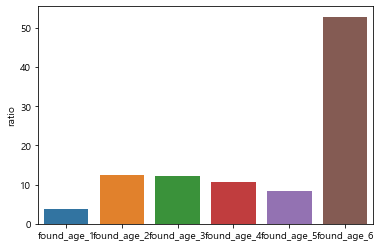

In [81]:
sns.barplot(x = df.index, y='ratio',data= df)
plt.show()

### 날리기 

In [213]:
df

,smbiz_yn_cnt,total_volume,guarantee_score,fail_percent,total_pop,total_fp
0,0.00,0.00,1.00,0.00,0.00,0.00
1,0.00,0.00,0.67,0.00,0.00,0.01
2,0.01,0.01,0.87,0.00,0.00,0.00
3,0.01,0.00,0.72,0.00,0.01,0.06
4,0.06,0.02,0.81,0.00,0.00,0.04
...,...,...,...,...,...,...
2252,0.00,0.00,0.67,0.00,0.01,0.01
2253,0.01,0.00,0.92,0.00,0.01,0.02
2254,0.00,0.00,1.00,0.00,0.00,0.00
2255,0.00,0.00,0.67,0.00,0.00,0.02


In [190]:
df.head(3)

,smbiz_yn_cnt,total_volume,guarantee_score,fail_percent,total_pop,total_fp
0,0.00,0.00,1.00,0.00,0.00,0.00
1,0.00,0.00,0.67,0.00,0.00,0.01
2,0.01,0.01,0.87,0.00,0.00,0.00


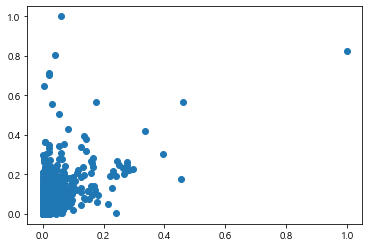

In [212]:
plt.scatter('total_volume','total_fp', data = df)

In [196]:
yi_1_gid.head()

,대분류코드,중분류코드,소분류코드,표준산업분류코드,표준산업분류명,행정동코드,행정동명,도로명주소,경도,위도,gid
0,Q,Q09,Q09A10,I56211,일반유흥 주점업,4146551000,풍덕천1동,경기도 용인시 수지구 풍덕천로139번길 6-5,127.10,37.32,다사64ab25aa
1,Q,Q01,Q01A08,I56111,한식 음식점업,4146551000,풍덕천1동,경기도 용인시 수지구 풍덕천로190번길 23,127.10,37.32,다사64bb25aa
2,Q,Q01,Q01A01,I56111,한식 음식점업,4146352000,구갈동,경기도 용인시 기흥구 갈곡로7번길 8,127.13,37.27,다사67aa19ab
3,Q,Q09,Q09A10,I56211,일반유흥 주점업,4146151000,중앙동,경기도 용인시 처인구 금령로71번길 2,127.20,37.24,다사73bb15aa
4,Q,Q10,Q10A01,I56111,한식 음식점업,4146359000,보정동,경기도 용인시 기흥구 죽전로 50,127.11,37.32,다사65bb24ba


In [204]:
yi_2[['중분류코드','중분류명']].value_counts()

중분류코드  중분류명         
R02    학원-창업취업취미        37
R03    학원-자격/국가고시       27
D01    음/식료품소매          25
D25    기타판매업            25
R07    학원-예능취미체육        24
P03    실외운동시설           22
Q01    한식               21
F13    기타서비스업           21
F07    물품기기대여           21
Q03    일식/수산물           20
D07    가정/주방/인테리어       19
D05    의복의류             18
R14    연구소              16
F03    개인/가정용품수리        16
P02    실내운동시설           15
D03    종합소매점            15
D14    운동/경기용품소매        13
D13    책/서적/도서          13
F19    법무세무회계           13
D04    취미/오락관련소매        13
D18    사진/광학/정밀기기소매     12
F04    운송/배달/택배         12
N06    전시/관람            12
R11    학교               12
P01    운영관리시설           11
D23    자동차/자동차용품        11
R09    학원기타             11
F12    광고/인쇄            10
D06    가방/신발/액세서리       10
N07    놀이/여가/취미         10
D21    철물/난방/건설자재소매     10
R20    기타교육기관           10
Q07    패스트푸드            10
Q05    닭/오리요리           10
Q09    유흥주점             10
N01    PC/오락/당구/볼링등     9 
F02    

In [202]:
yi_2[['대분류명','대분류코드']].value_counts()

대분류명      대분류코드
소매        D        256
학문/교육     R        168
생활서비스     F        161
음식        Q        117
관광/여가/오락  N        64 
스포츠       P        48 
부동산       L        18 
숙박        O        5  
dtype: int64

In [210]:
yi_1_gid[yi_1_gid['대분류코드'] == 'R']['표준산업분류명'].value_counts()

일반 교과 학원           1758
예술 학원              846 
외국어학원              814 
보육시설 운영업           634 
스포츠 교육기관           256 
그외 기타 분류안된 교육기관    169 
독서실 운영업            143 
방문 교육 학원           97  
레크레이션 교육기관         48  
기타 기술 및 직업훈련학원     44  
유아 교육기관            27  
컴퓨터 학원             22  
그외 기타 스포츠 서비스업     7   
운전학원               7   
기타 일반 교습학원         2   
교육관련 자문 및 평가업      1   
Name: 표준산업분류명, dtype: int64

In [ ]:
office = ['R','L']

In [201]:
yi_2.head()

,대분류코드,대분류명,중분류코드,중분류명,소분류코드,소분류명
0,Q,음식,Q05,닭/오리요리,Q05A01,삼계탕전문
1,Q,음식,Q05,닭/오리요리,Q05A02,닭갈비전문
2,Q,음식,Q01,한식,Q01A16,보리밥전문
3,Q,음식,Q05,닭/오리요리,Q05A09,오리고기전문
4,Q,음식,Q05,닭/오리요리,Q05A07,토종닭전문


In [203]:
yi_1_gid.head()

,대분류코드,중분류코드,소분류코드,표준산업분류코드,표준산업분류명,행정동코드,행정동명,도로명주소,경도,위도,gid
0,Q,Q09,Q09A10,I56211,일반유흥 주점업,4146551000,풍덕천1동,경기도 용인시 수지구 풍덕천로139번길 6-5,127.10,37.32,다사64ab25aa
1,Q,Q01,Q01A08,I56111,한식 음식점업,4146551000,풍덕천1동,경기도 용인시 수지구 풍덕천로190번길 23,127.10,37.32,다사64bb25aa
2,Q,Q01,Q01A01,I56111,한식 음식점업,4146352000,구갈동,경기도 용인시 기흥구 갈곡로7번길 8,127.13,37.27,다사67aa19ab
3,Q,Q09,Q09A10,I56211,일반유흥 주점업,4146151000,중앙동,경기도 용인시 처인구 금령로71번길 2,127.20,37.24,다사73bb15aa
4,Q,Q10,Q10A01,I56111,한식 음식점업,4146359000,보정동,경기도 용인시 기흥구 죽전로 50,127.11,37.32,다사65bb24ba


In [197]:
yi_1_gid[yi_1_gid['표준산업분류명'] == '한식']

,대분류코드,중분류코드,소분류코드,표준산업분류코드,표준산업분류명,행정동코드,행정동명,도로명주소,경도,위도,gid


In [181]:
yong_analysis.head()

,gid,ws_cnt,smbiz_yn_cnt,age10_ratio,age20_ratio,age30_ratio,age40_ratio,age50_ratio,age60_ratio,age70_ratio,Ah,Jum,Ju,Rest,total_volume,guarantee_score,fail_percent,high_volume,total_pop,working_pop,total_fp,age_2030_ratio,coffee_counts
0,다바67bb99aa,1,1,0.00,0.00,0.00,0.00,100.00,0.00,0.00,74.97,61.47,31.07,49.48,256,6.00,0.00,256.00,0.00,0.00,216.99,0.00,0.00
1,다바68aa99ba,1,0,0.17,3.50,9.58,15.83,14.50,2.08,0.00,514.30,596.30,403.66,444.72,7312,4.00,0.00,7312.00,0.00,0.00,1958.98,13.08,0.00
2,다바68aa99bb,5,3,0.16,2.66,13.79,21.39,13.11,2.16,2.55,182.42,211.31,140.92,156.78,37466,5.20,0.00,7493.20,6.00,0.00,691.43,16.45,0.00
3,다바68ab99ba,3,3,0.02,2.05,8.71,17.07,31.41,4.34,0.24,4598.08,5275.67,3547.02,3982.27,9167,4.33,0.00,3055.67,48.00,31.00,17403.04,10.76,0.00
4,다바68ba99ab,16,13,0.27,8.60,19.65,18.52,18.85,3.28,0.82,3024.87,3202.24,2209.42,2671.80,78733,4.88,0.00,4920.81,11.00,10.00,11108.33,28.25,2.00


In [179]:
yong_geometry.tail()

,gid,ws_cnt,found_age_1,found_age_2,found_age_3,found_age_4,found_age_5,found_age_6,runout_cnt,smbiz_yn_cnt,rpr_per_gender_m,rpr_per_gender_f,rpr_per_age_bin_10,rpr_per_age_bin_20,rpr_per_age_bin_30to50,rpr_per_age_bin_50over,sme_loan_cnt,sme_loan_y_1,sme_loan_y_2,sme_loan_y_3,sme_loan_y_4,sme_loan_y_5,sme_loan_y_6,sales_est_amt_201703,sales_est_amt_201706,sales_est_amt_201709,sales_est_amt_201712,sales_est_amt_201803,sales_est_amt_201806,sales_est_amt_201809,sales_est_amt_201812,sales_est_amt_201903,sales_est_amt_201906,sales_est_amt_201909,sales_est_amt_201912,sales_est_amt_202003,sales_est_amt_202006,sales_est_amt_202009,age10_ratio,age20_ratio,age30_ratio,age40_ratio,age50_ratio,age60_ratio,age70_ratio,indcd_a_yn,indcd_b_yn,indcd_c_yn,indcd_d_yn,indcd_e_yn,indcd_f_yn,indcd_g_yn,indcd_h_yn,indcd_i_yn,indcd_j_yn,indcd_k_yn,indcd_l_yn,indcd_m_yn,indcd_n_yn,indcd_o_yn,indcd_p_yn,indcd_q_yn,indcd_r_yn,indcd_s_yn,indcd_t_yn,indcd_u_yn
2252,다사92ab02bb,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,10,5,23,87,21,0,5,33,4,3,0,3,0.00,2.00,12.10,48.20,5.40,9.00,6.50,NaN,nan,NaN,NaN,nan,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,nan
2253,다사92ab03aa,2,0,0,0,0,1,1,0,2,2,0,0,0,1,1,0,0,0,0,0,0,0,261,52,0,0,0,0,0,29,65,0,7,0,0,0,29,0.00,0.00,28.57,4.71,14.29,14.29,23.86,NaN,nan,NaN,NaN,nan,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,nan
2254,다사92ab04ab,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,1097,1006,798,1625,1329,816,896,1101,1252,1587,2049,1020,1645,585,784,0.00,3.00,14.33,42.40,21.80,11.00,5.67,NaN,nan,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,Y,NaN,NaN,NaN,nan
2255,다사92ab05ab,2,0,1,0,0,0,1,0,1,2,0,0,0,2,0,1,0,0,0,1,0,0,0,0,0,0,0,54,0,0,40,93,154,92,121,124,166,0.00,9.88,33.13,18.00,19.75,2.13,0.00,NaN,nan,Y,NaN,nan,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,nan
2256,다사92ba02bb,3,0,0,0,0,1,1,1,0,1,2,0,0,2,1,2,0,1,0,0,0,1,177,760,204,106,194,198,183,53,382,412,92,42,0,367,0,0.29,30.17,12.04,9.38,11.54,8.88,0.75,NaN,nan,Y,NaN,nan,NaN,Y,NaN,Y,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,nan


In [178]:
yong_analysis.tail()

,gid,smbiz_yn_cnt,total_volume,guarantee_score,fail_percent,total_pop,total_fp
2252,다사92ab02bb,1,194,4.00,0.00,31.00,3227.65
2253,다사92ab03aa,2,443,5.50,0.00,34.00,5356.07
2254,다사92ab04ab,0,17590,6.00,0.00,7.00,708.82
2255,다사92ab05ab,1,844,4.00,0.00,0.00,4688.63
2256,다사92ba02bb,0,3170,3.67,33.33,22.00,706.95


In [177]:
yong_analysis['fail_percent']

0      0.00 
1      0.00 
2      0.00 
3      0.00 
4      0.00 
       ...  
2252   0.00 
2253   0.00 
2254   0.00 
2255   0.00 
2256   33.33
Name: fail_percent, Length: 2257, dtype: float64

In [ ]:
raw_

In [176]:
yong_geometry.iloc[2]['runout_cnt']

0

In [174]:
yong_geometry.head(3)

,gid,ws_cnt,found_age_1,found_age_2,found_age_3,found_age_4,found_age_5,found_age_6,runout_cnt,smbiz_yn_cnt,rpr_per_gender_m,rpr_per_gender_f,rpr_per_age_bin_10,rpr_per_age_bin_20,rpr_per_age_bin_30to50,rpr_per_age_bin_50over,sme_loan_cnt,sme_loan_y_1,sme_loan_y_2,sme_loan_y_3,sme_loan_y_4,sme_loan_y_5,sme_loan_y_6,sales_est_amt_201703,sales_est_amt_201706,sales_est_amt_201709,sales_est_amt_201712,sales_est_amt_201803,sales_est_amt_201806,sales_est_amt_201809,sales_est_amt_201812,sales_est_amt_201903,sales_est_amt_201906,sales_est_amt_201909,sales_est_amt_201912,sales_est_amt_202003,sales_est_amt_202006,sales_est_amt_202009,age10_ratio,age20_ratio,age30_ratio,age40_ratio,age50_ratio,age60_ratio,age70_ratio,indcd_a_yn,indcd_b_yn,indcd_c_yn,indcd_d_yn,indcd_e_yn,indcd_f_yn,indcd_g_yn,indcd_h_yn,indcd_i_yn,indcd_j_yn,indcd_k_yn,indcd_l_yn,indcd_m_yn,indcd_n_yn,indcd_o_yn,indcd_p_yn,indcd_q_yn,indcd_r_yn,indcd_s_yn,indcd_t_yn,indcd_u_yn
0,다바67bb99aa,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57,0,199,0.00,0.00,0.00,0.00,100.00,0.00,0.00,NaN,nan,NaN,NaN,nan,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,nan
1,다바68aa99ba,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,32,345,564,888,1187,699,822,716,601,565,502,391,0.17,3.50,9.58,15.83,14.50,2.08,0.00,NaN,nan,NaN,NaN,nan,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,nan
2,다바68aa99bb,5,0,1,0,0,0,4,0,3,4,1,0,0,3,2,2,1,0,0,0,0,1,1682,2016,2029,2147,1627,1876,2062,2388,2610,3469,3012,3377,2458,3648,3065,0.16,2.66,13.79,21.39,13.11,2.16,2.55,NaN,nan,Y,NaN,nan,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,nan


In [160]:
yi_4.val.fillna(0, inplace =True)

In [163]:
yi_4.sort_values('val', ascending = False).head(10)

,gid,val,geometry
4687,다사631172,489.00,"MULTIPOLYGON (((127.08390 37.25295, 127.08390 37.25385, 127.08502 37.25386, 127.08503 37.25296, 127.08390 37.25295)))"
14763,다사689189,392.00,"MULTIPOLYGON (((127.14923 37.26849, 127.14923 37.26939, 127.15035 37.26939, 127.15036 37.26849, 127.14923 37.26849)))"
14336,다사687190,309.00,"MULTIPOLYGON (((127.14697 37.26938, 127.14697 37.27028, 127.14809 37.27029, 127.14810 37.26939, 127.14697 37.26938)))"
35834,다사769078,298.00,"MULTIPOLYGON (((127.23980 37.16867, 127.23980 37.16957, 127.24093 37.16957, 127.24093 37.16867, 127.23980 37.16867)))"
14124,다사686190,296.00,"MULTIPOLYGON (((127.14584 37.26938, 127.14584 37.27028, 127.14697 37.27028, 127.14697 37.26938, 127.14584 37.26938)))"
13912,다사685190,253.00,"MULTIPOLYGON (((127.14472 37.26938, 127.14471 37.27028, 127.14584 37.27028, 127.14584 37.26938, 127.14472 37.26938)))"
3440,다사620244,235.00,"MULTIPOLYGON (((127.07113 37.31781, 127.07112 37.31871, 127.07225 37.31871, 127.07226 37.31781, 127.07113 37.31781)))"
3893,다사624244,230.00,"MULTIPOLYGON (((127.07564 37.31782, 127.07564 37.31873, 127.07677 37.31873, 127.07677 37.31783, 127.07564 37.31782)))"
3887,다사624238,222.00,"MULTIPOLYGON (((127.07567 37.31242, 127.07567 37.31332, 127.07680 37.31332, 127.07680 37.31242, 127.07567 37.31242)))"
8847,다사660173,216.00,"MULTIPOLYGON (((127.11660 37.25397, 127.11659 37.25487, 127.11772 37.25487, 127.11772 37.25397, 127.11660 37.25397)))"


In [153]:
del yong_geometry['geometry']

In [155]:
yong_geometry.head(3)

,gid,ws_cnt,found_age_1,found_age_2,found_age_3,found_age_4,found_age_5,found_age_6,runout_cnt,smbiz_yn_cnt,rpr_per_gender_m,rpr_per_gender_f,rpr_per_age_bin_10,rpr_per_age_bin_20,rpr_per_age_bin_30to50,rpr_per_age_bin_50over,sme_loan_cnt,sme_loan_y_1,sme_loan_y_2,sme_loan_y_3,sme_loan_y_4,sme_loan_y_5,sme_loan_y_6,sales_est_amt_201703,sales_est_amt_201706,sales_est_amt_201709,sales_est_amt_201712,sales_est_amt_201803,sales_est_amt_201806,sales_est_amt_201809,sales_est_amt_201812,sales_est_amt_201903,sales_est_amt_201906,sales_est_amt_201909,sales_est_amt_201912,sales_est_amt_202003,sales_est_amt_202006,sales_est_amt_202009,age10_ratio,age20_ratio,age30_ratio,age40_ratio,age50_ratio,age60_ratio,age70_ratio,indcd_a_yn,indcd_b_yn,indcd_c_yn,indcd_d_yn,indcd_e_yn,indcd_f_yn,indcd_g_yn,indcd_h_yn,indcd_i_yn,indcd_j_yn,indcd_k_yn,indcd_l_yn,indcd_m_yn,indcd_n_yn,indcd_o_yn,indcd_p_yn,indcd_q_yn,indcd_r_yn,indcd_s_yn,indcd_t_yn,indcd_u_yn
0,다바67bb99aa,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57,0,199,0.00,0.00,0.00,0.00,100.00,0.00,0.00,NaN,nan,NaN,NaN,nan,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,nan
1,다바68aa99ba,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,32,345,564,888,1187,699,822,716,601,565,502,391,0.17,3.50,9.58,15.83,14.50,2.08,0.00,NaN,nan,NaN,NaN,nan,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,nan
2,다바68aa99bb,5,0,1,0,0,0,4,0,3,4,1,0,0,3,2,2,1,0,0,0,0,1,1682,2016,2029,2147,1627,1876,2062,2388,2610,3469,3012,3377,2458,3648,3065,0.16,2.66,13.79,21.39,13.11,2.16,2.55,NaN,nan,Y,NaN,nan,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,nan


In [96]:
yong_analysis.corrwith(yong_analysis['total_volume'])

ws_cnt            0.83 
smbiz_yn_cnt      0.76 
age10_ratio       0.09 
age20_ratio       0.04 
age30_ratio       -0.01
age40_ratio       0.11 
age50_ratio       0.01 
age60_ratio       -0.02
age70_ratio       0.02 
Ah                0.53 
Jum               0.53 
Ju                0.56 
Rest              0.52 
total_volume      1.00 
guarantee_score   -0.01
fail_percent      0.03 
high_volume       0.24 
total_pop         0.21 
working_pop       0.22 
total_fp          0.54 
age_2030_ratio    0.01 
coffee_counts     0.73 
dtype: float64

In [35]:
yong_analysis = pd.read_csv('yong_analysis.csv', index_col = 0 )

In [14]:
del yong_analysis['Ah']
del yong_analysis['Jum']
del yong_analysis['Ju']
del yong_analysis['Rest']

In [24]:
del yong_analysis['high_volume']

In [37]:
del yong_analysis['smbiz_yn_cnt']

In [38]:
del yong_analysis['working_pop']

In [27]:
yong_analysis.drop(['age10_ratio','age20_ratio','age30_ratio',\
                    'age40_ratio','age50_ratio','age60_ratio','age70_ratio'], axis=1, inplace =True)

In [40]:
yong_analysis.drop(['age_2030_ratio'],axis= 1, inplace = True)

In [41]:
yong_analysis.head()

,gid,ws_cnt,age10_ratio,age20_ratio,age30_ratio,age40_ratio,age50_ratio,age60_ratio,age70_ratio,Ah,Jum,Ju,Rest,total_volume,guarantee_score,fail_percent,high_volume,total_pop,total_fp,coffee_counts
0,다바67bb99aa,1,0.00,0.00,0.00,0.00,100.00,0.00,0.00,74.97,61.47,31.07,49.48,256,6.00,0.00,256.00,0.00,216.99,0.00
1,다바68aa99ba,1,0.17,3.50,9.58,15.83,14.50,2.08,0.00,514.30,596.30,403.66,444.72,7312,4.00,0.00,7312.00,0.00,1958.98,0.00
2,다바68aa99bb,5,0.16,2.66,13.79,21.39,13.11,2.16,2.55,182.42,211.31,140.92,156.78,37466,5.20,0.00,7493.20,6.00,691.43,0.00
3,다바68ab99ba,3,0.02,2.05,8.71,17.07,31.41,4.34,0.24,4598.08,5275.67,3547.02,3982.27,9167,4.33,0.00,3055.67,48.00,17403.04,0.00
4,다바68ba99ab,16,0.27,8.60,19.65,18.52,18.85,3.28,0.82,3024.87,3202.24,2209.42,2671.80,78733,4.88,0.00,4920.81,11.00,11108.33,2.00


In [30]:
y = yong_analysis['total_volume']

In [33]:
yong_analysis.drop(['total_fp','total_volume'], axis =1 , inplace =True)

In [34]:
yong_analysis.head()

,gid,ws_cnt,Ah,Jum,Ju,Rest,guarantee_score,fail_percent,total_pop
0,다바67bb99aa,1,74.97,61.47,31.07,49.48,6.00,0.00,0.00
1,다바68aa99ba,1,514.30,596.30,403.66,444.72,4.00,0.00,0.00
2,다바68aa99bb,5,182.42,211.31,140.92,156.78,5.20,0.00,6.00
3,다바68ab99ba,3,4598.08,5275.67,3547.02,3982.27,4.33,0.00,48.00
4,다바68ba99ab,16,3024.87,3202.24,2209.42,2671.80,4.88,0.00,11.00


In [113]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(yong_analysis.iloc[:,1:])

MinMaxScaler()

In [114]:
x = scaler.transform(yong_analysis.iloc[:,1:])

In [116]:
df = pd.DataFrame(x)

In [119]:
df.rename(columns = {0:'ws_cnt',1:'smbiz_yn_cnt',2:'total_volume',3:'guarantee_score',\
                    4:'fail_percent',5:'total_pop',6:'working_pop',7:'total_fp'}, inplace =True)

In [129]:
yong_analysis.corr()

,smbiz_yn_cnt,total_volume,guarantee_score,fail_percent,total_pop,total_fp
smbiz_yn_cnt,1.00,0.76,-0.04,0.04,0.33,0.52
total_volume,0.76,1.00,-0.01,0.03,0.21,0.54
guarantee_score,-0.04,-0.01,1.00,-0.37,-0.09,-0.00
fail_percent,0.04,0.03,-0.37,1.00,0.02,0.03
total_pop,0.33,0.21,-0.09,0.02,1.00,0.33
total_fp,0.52,0.54,-0.00,0.03,0.33,1.00


In [330]:
yong_analysis.head(1)

,gid,ws_cnt,age10_ratio,age20_ratio,age30_ratio,age40_ratio,age50_ratio,age60_ratio,age70_ratio,Ah,Jum,Ju,Rest,total_volume,guarantee_score,fail_percent,total_pop,working_pop,coffee_counts
0,다바67bb99aa,1,0.00,0.00,0.00,0.00,100.00,0.00,0.00,74.97,61.47,31.07,49.48,256,6.00,0.00,0.00,0.00,0.00


In [335]:
yong_analysis.loc[:,'ws_cnt']

0       1 
1       1 
2       5 
3       3 
4       16
        ..
2252    1 
2253    2 
2254    1 
2255    2 
2256    3 
Name: ws_cnt, Length: 2257, dtype: int64

In [337]:
yong_analysis.head(1)

,gid,ws_cnt,age10_ratio,age20_ratio,age30_ratio,age40_ratio,age50_ratio,age60_ratio,age70_ratio,Ah,Jum,Ju,Rest,total_volume,guarantee_score,fail_percent,total_pop,working_pop,coffee_counts
0,다바67bb99aa,1,0.00,0.00,0.00,0.00,100.00,0.00,0.00,74.97,61.47,31.07,49.48,256,6.00,0.00,0.00,0.00,0.00


In [367]:
df.corr()

,ws_cnt,total_volume,guarantee_score,Runout_percent,total_pop
ws_cnt,1.00,0.83,-0.04,0.04,0.31
total_volume,0.83,1.00,-0.01,0.03,0.21
guarantee_score,-0.04,-0.01,1.00,-0.37,-0.09
Runout_percent,0.04,0.03,-0.37,1.00,0.02
total_pop,0.31,0.21,-0.09,0.02,1.00


In [247]:
yong.head()

,ws_cnt,found_age_1,found_age_2,found_age_3,found_age_4,found_age_5,found_age_6,sme_loan_y_1,sme_loan_y_2,sme_loan_y_3,sme_loan_y_4,sme_loan_y_5,sme_loan_y_6,age10_ratio,age20_ratio,age30_ratio,age40_ratio,age50_ratio,age60_ratio,age70_ratio,Ah,Jum,Ju,Rest,Runout_percent,guarantee_score,Total_pop,total_pop,total_volume
0,1,0,0,0,0,0,1,0,0,0,1,0,0,0.00000,0.00000,0.00000,0.00000,100.00000,0.00000,0.00000,74.97000,61.47000,31.07000,49.48000,0.00000,6.00000,0.00000,0.00000,256
1,1,0,0,0,1,0,0,0,0,0,0,0,0,0.17000,3.50000,9.58000,15.83000,14.50000,2.08000,0.00000,514.30000,596.30000,403.66000,444.72000,0.00000,4.00000,0.00000,0.00000,7312
2,5,0,1,0,0,0,4,1,0,0,0,0,1,0.16000,2.66000,13.79000,21.39000,13.11000,2.16000,2.55000,182.42000,211.31000,140.92000,156.78000,0.00000,5.20000,6.00000,6.00000,37466
3,3,0,0,1,0,2,0,0,0,0,0,0,0,0.02000,2.05000,8.71000,17.07000,31.41000,4.34000,0.24000,4598.08000,5275.67000,3547.02000,3982.27000,0.00000,4.33333,48.00000,48.00000,9167
4,16,0,1,2,3,2,8,0,1,1,1,0,0,0.27000,8.60000,19.65000,18.52000,18.85000,3.28000,0.82000,3024.87000,3202.24000,2209.42000,2671.80000,0.00000,4.87500,11.00000,11.00000,78733


In [262]:
yong['Total_fp'] = yong_analysis['total_fp']

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# 선생님 페어플랏입니다

In [185]:
df = yong_analysis.loc[:,['ws_cnt','total_volume','guarantee_score','total_fp','total_pop','sme_loan_y_6']]

<Figure size 864x864 with 0 Axes>

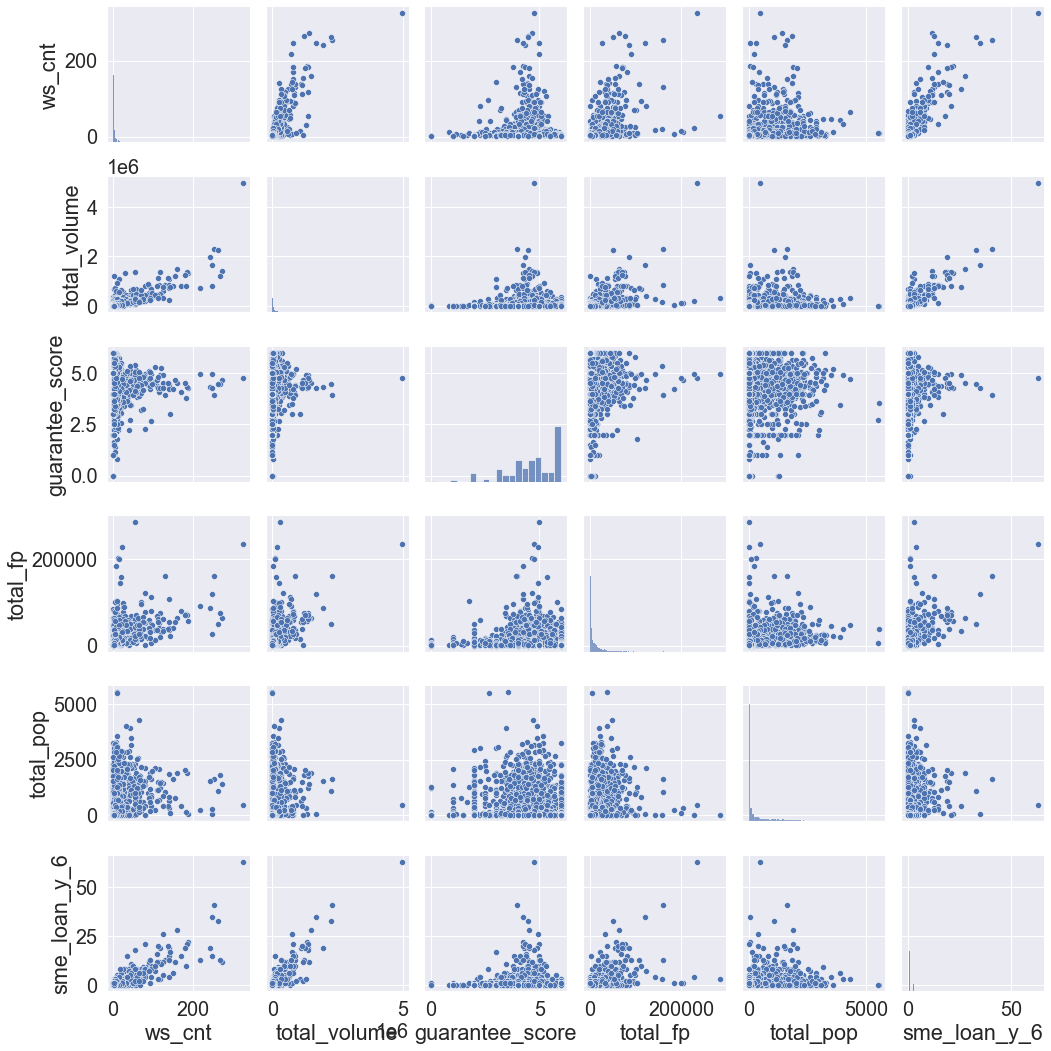

In [186]:
plt.figure(figsize = (12,12))
sns.set(font_scale = 1.8)
sns.pairplot(df)
plt.show()

In [187]:
df.corr()

,ws_cnt,total_volume,guarantee_score,total_fp,total_pop,sme_loan_y_6
ws_cnt,1.00000,0.83290,-0.03912,0.54149,0.30527,0.85061
total_volume,0.83290,1.00000,-0.01278,0.53901,0.21313,0.88728
guarantee_score,-0.03912,-0.01278,1.00000,-0.00363,-0.09154,-0.00826
total_fp,0.54149,0.53901,-0.00363,1.00000,0.32524,0.52031
total_pop,0.30527,0.21313,-0.09154,0.32524,1.00000,0.20777
sme_loan_y_6,0.85061,0.88728,-0.00826,0.52031,0.20777,1.00000


# 여기까지 입니다

In [274]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [288]:
scaled_df = scaler.fit_transform(df)

In [289]:
scaled_df = pd.DataFrame(scaled_df)

In [292]:
df.columns

Index(['ws_cnt', 'total_volume', 'guarantee_score', 'Total_fp', 'Total_pop', 'sme_loan_y_6'], dtype='object')

In [ ]:
for i in range(len(df.columns))

In [294]:
scaled_df.rename(columns ={0:'ws_cnt',1:'total_volume',2:'guarantee_score',3:'Total_fp',
                          4:'Total_pop', 5:'sme_loan_y_6'}, inplace = True)

C:\Users\USER\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


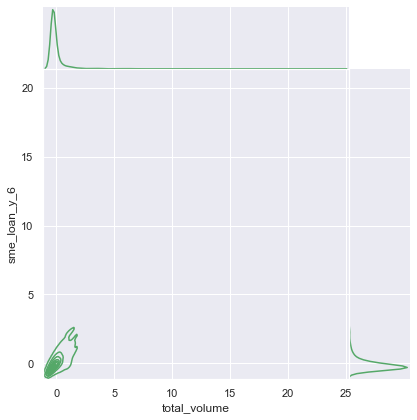

In [297]:
sns.set(font_scale = 1)
sns.jointplot('total_volume','sme_loan_y_6'
, data = scaled_df, kind = 'kde'\
             ,space = 0, color='g')
plt.show()

In [108]:
yong_analysis.corrwith(yong_analysis['total_volume'])

ws_cnt            0.83 
smbiz_yn_cnt      0.76 
total_volume      1.00 
guarantee_score   -0.01
fail_percent      0.03 
total_pop         0.21 
working_pop       0.22 
total_fp          0.54 
dtype: float64

In [107]:
yong_analysis.describe()

,ws_cnt,smbiz_yn_cnt,total_volume,guarantee_score,fail_percent,total_pop,working_pop,total_fp
count,2257.00,2257.00,2257.00,2257.00,2257.00,2257.00,2257.00,2257.00
mean,10.37,7.40,65159.61,4.62,2.52,398.60,286.85,11504.89
std,25.68,18.30,200524.87,1.25,9.67,696.15,502.62,20584.19
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,1.00,1303.00,4.00,0.00,0.00,0.00,795.83
50%,3.00,2.00,8674.00,4.76,0.00,37.00,23.00,4011.96
75%,7.00,5.00,44537.00,6.00,0.00,472.00,347.00,13447.39
max,325.00,219.00,4964721.00,6.00,100.00,5526.00,3957.00,283872.94


In [95]:
yong_analysis[['smbiz_yn_cnt','guarantee_score','total_pop','total_fp','total_volume']].corr()

,smbiz_yn_cnt,guarantee_score,total_pop,total_fp,total_volume
smbiz_yn_cnt,1.00,-0.04,0.33,0.52,0.76
guarantee_score,-0.04,1.00,-0.09,-0.00,-0.01
total_pop,0.33,-0.09,1.00,0.33,0.21
total_fp,0.52,-0.00,0.33,1.00,0.54
total_volume,0.76,-0.01,0.21,0.54,1.00


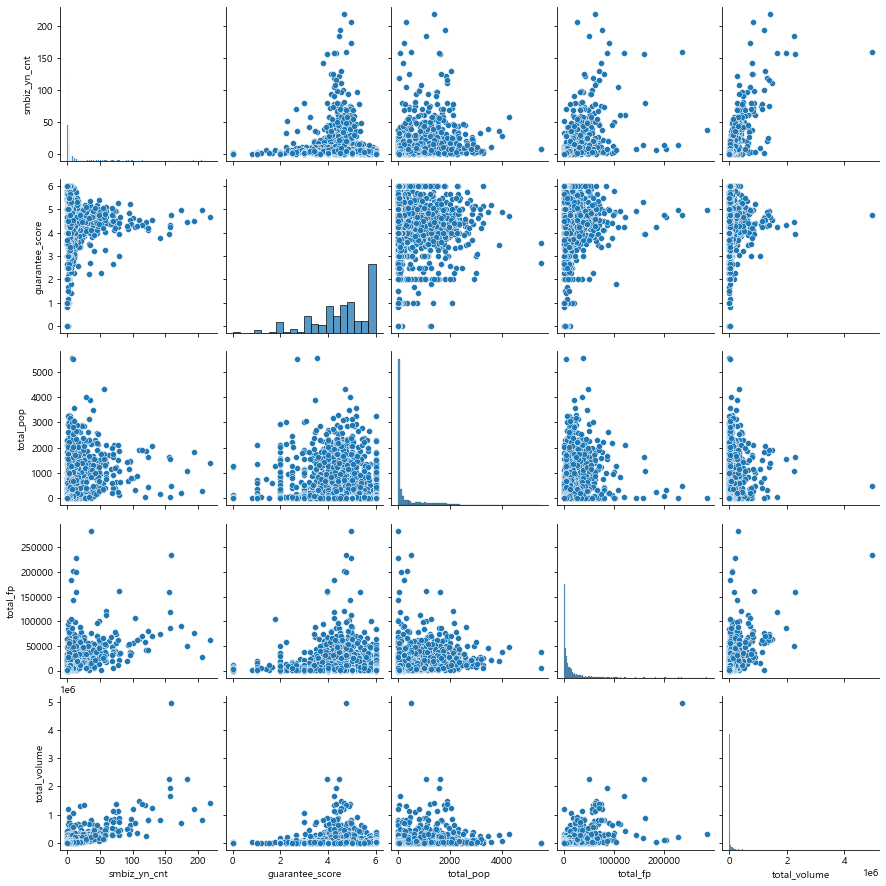

In [93]:
sns.pairplot(yong_analysis[['smbiz_yn_cnt','guarantee_score','total_pop','total_fp','total_volume']])

# 선생님 아파트 상권 격자 추출 입니다

In [ ]:
# 15,08,12,09

In [158]:
a = yi_2[yi_2['대분류명'] == '음식'][['중분류코드','중분류명']].groupby\
(['중분류코드','중분류명']).count()

In [163]:
Apart_df = yong_analysis.sort_values('total_pop', ascending = False).head(20).sort_values('total_volume', ascending = False)\


#### 아파트상권 경쟁업체 숫자 세기

In [165]:
Apart_df.reset_index(inplace = True)
list = Apart_df.gid

C = []
Com = 0
Competitor = ['Q01','Q02','Q03','Q04','Q05','Q06','Q07','Q10','Q11','Q13','Q14']

for i in list:
    Apart = yi_1_gid[yi_1_gid['gid']==i]['중분류코드']
    Com = 0
    for j in Apart:
        if j in Competitor:
            Com += 1
    C.append(Com)
        
Apart_df['Competitor'] = C

#### 아파트 상권 격자 추출

In [168]:
import folium

center = (37.25, 127.11)
zoom = 15


m = folium.Map(location=center,
            zoom_start=zoom,
            tiles='http://api.vworld.kr/req/wmts/1.0.0/8A493903-DE32-3DB0-AD78-4ECBE52B86D3/gray/{z}/{y}/{x}.png',
            attr='용인시'
               )

style1 = {'fillColor': '#0D35F2', 'lineColor': '#0D35F2', 'color':'#0D35F2','fillOpacity':0.5}
style2 = {'fillColor': '#F52F3D', 'lineColor': '#F52F3D', 'color':'#F52F3D'}

num = range(1,len(Apart_df)+1)

for g, n, c in zip(Apart_df.gid,num,Apart_df.Competitor):
    folium.GeoJson(yong_geometry[yong_geometry['gid'] == g], style_function=lambda x: style1,
                  tooltip = '격자이름: {} <br> 매출순위: {}위 <br> 경쟁업체 수: {}'.format(g,n,c)).add_to(m)
    


m

# 선생님 오피스 격자 추출입니다

In [174]:
sme_df = yongsales.sort_values('sme_loan_y_6', ascending = False).head(20)

In [99]:
a = yi_1_gid[yi_1_gid['gid']=='다사64aa24bb']['중분류코드'].value_counts()
b = []
for i in sme_df['gid']:
    b.append(yi_1_gid[yi_1_gid['gid']==i]['중분류코드'].value_counts())
   

In [175]:
import folium

center = (37.25, 127.11)
zoom = 15


m = folium.Map(location=center,
            zoom_start=zoom,
            tiles='http://api.vworld.kr/req/wmts/1.0.0/8A493903-DE32-3DB0-AD78-4ECBE52B86D3/gray/{z}/{y}/{x}.png',
            attr='용인시'
               )

style1 = {'fillColor': '#0D35F2', 'lineColor': '#0D35F2', 'color':'#0D35F2','fillOpacity':0.5}
style2 = {'fillColor': '#F52F3D', 'lineColor': '#F52F3D', 'color':'#F52F3D'}

num = range(1,len(sme_df)+1)

for gid,n,c in zip(sme_df.gid,num, sme_df.sme_loan_y_6):
    folium.GeoJson(yong_geometry[yong_geometry['gid'] == gid], style_function=lambda x: style1,
                  tooltip='gid: {} <br> 순위 :{}위 <br> 10억이상 업체수: {}개'.format(gid,n,c)).add_to(m)
    


m

# 여기까지입니다

In [101]:
b = pd.DataFrame(b)

In [116]:
b1 = b.sum()/ len(sme_df)

In [123]:
yi_2[yi_2['중분류코드']=='F01']

,대분류코드,대분류명,중분류코드,중분류명,소분류코드,소분류명
269,F,생활서비스,F01,이/미용/건강,F01A04,남성미용실
270,F,생활서비스,F01,이/미용/건강,F01A01,여성미용실
271,F,생활서비스,F01,이/미용/건강,F01A03,비만/피부관리
272,F,생활서비스,F01,이/미용/건강,F01A02,발/네일케어
273,F,생활서비스,F01,이/미용/건강,F01A05,미용실-어린이


In [117]:
b1.sort_values(ascending = False)

D05   34.65000
Q01   20.95000
F01   19.85000
R01   15.25000
D03   12.55000
Q12   11.25000
R04   9.90000 
Q04   9.00000 
Q09   8.10000 
R09   7.40000 
D18   6.90000 
R05   6.50000 
D16   6.50000 
L01   5.80000 
D01   5.70000 
Q07   5.30000 
D06   5.15000 
Q03   4.90000 
Q05   4.55000 
N01   4.15000 
Q08   3.55000 
D14   3.25000 
D10   3.05000 
D07   3.05000 
Q06   2.90000 
F02   2.60000 
N02   2.50000 
Q10   2.45000 
R07   2.20000 
N05   1.85000 
D13   1.75000 
Q02   1.75000 
F03   1.70000 
R10   1.65000 
L03   1.55000 
D08   1.50000 
R08   1.45000 
F14   1.35000 
D12   1.30000 
D26   1.30000 
D20   1.15000 
D02   1.10000 
R13   1.05000 
F06   0.90000 
F07   0.90000 
D11   0.75000 
D23   0.75000 
D25   0.75000 
F09   0.75000 
F11   0.60000 
F13   0.60000 
F15   0.50000 
D04   0.45000 
F05   0.45000 
D15   0.40000 
O02   0.40000 
N08   0.40000 
Q15   0.35000 
D09   0.30000 
P02   0.30000 
F17   0.30000 
D21   0.30000 
N07   0.25000 
D17   0.25000 
D24   0.20000 
F12   0.20000 
R02   0.20

In [87]:
sme_df['gid']

0     다사64aa24bb
1     다사61bb22aa
2     다사69aa19bb
3     다사65bb24ba
4     다사63aa23aa
5     다사74aa15aa
6     다사62aa19bb
7     다사62ab18ba
8     다사69ab19bb
9     다사66ab21ba
10    다사73bb15aa
11    다사64aa25aa
12    다사65ab17ab
13    다사62ba23bb
14    다사69bb20ab
15    다사65ab25ba
16    다사72ab14bb
17    다사65ba24ba
18    다사63bb19aa
19    다사73bb15ab
Name: gid, dtype: object

In [28]:
yongsales.drop(['geometry','coordinates'], axis =1, inplace =  True)

In [56]:
sme_gid

362     다사64aa24bb
124     다사61bb22aa
965     다사69aa19bb
656     다사65bb24ba
252     다사63aa23aa
1414    다사74aa15aa
152     다사62aa19bb
176     다사62ab18ba
993     다사69ab19bb
704     다사66ab21ba
1374    다사73bb15aa
363     다사64aa25aa
557     다사65ab17ab
217     다사62ba23bb
1043    다사69bb20ab
587     다사65ab25ba
1231    다사72ab14bb
623     다사65ba24ba
319     다사63bb19aa
1375    다사73bb15ab
Name: gid, dtype: object

In [35]:
sme_df.reset_index(inplace = True)

In [38]:
len(sme_df),len(num)

(20, 20)

In [49]:
sme_low = yongsales.sort_values('ws_cnt',ascending = False).head(50).sort_values('sme_loan_y_6', ascending = True).head(20)

In [125]:
import folium

center = (37.25, 127.11)
zoom = 15


m = folium.Map(location=center,
            zoom_start=zoom,
            tiles='http://api.vworld.kr/req/wmts/1.0.0/8A493903-DE32-3DB0-AD78-4ECBE52B86D3/gray/{z}/{y}/{x}.png',
            attr='용인시'
               )

style1 = {'fillColor': '#0D35F2', 'lineColor': '#0D35F2', 'color':'#0D35F2','fillOpacity':0.5}
style2 = {'fillColor': '#F52F3D', 'lineColor': '#F52F3D', 'color':'#F52F3D'}

num = range(1,len(sme_df)+1)

for gid,n,c in zip(sme_df.gid,num, sme_df.sme_loan_y_6):
    folium.GeoJson(yong_geometry[yong_geometry['gid'] == gid], style_function=lambda x: style1,
                  tooltip='gid: {} <br> 순위 :{}위 <br> 10억이상 업체수: {}개'.format(gid,n,c)).add_to(m)
    


m

In [138]:
del yong_analysis['runout_cnt']
del yong_analysis['coordinates']
del yong_analysis['geometry']

In [139]:
for col in yong_analysis.columns:
    if col.split('_')[0] == 'found':
        del yong_analysis[col]

In [140]:
for col in yong_analysis.columns:
    if col.split('_')[0] == 'sales':
        del yong_analysis[col]

In [141]:
for col in yong_analysis.columns:
    if col.split('_')[0] == 'sme':
        del yong_analysis[col]

In [142]:
for col in yong_analysis.columns:
    if col.split('_')[0] == 'rpr':
        del yong_analysis[col]

In [143]:
for col in yong_analysis.columns:
    if col.split('f')[0] == 'high_':
        del yong_analysis[col]

In [20]:
yong_analysis['total_fp'] = yong_analysis[['Ah', 'Jum', 'Ju', 'Rest']].sum(axis=1)

In [145]:
len(yong_analysis.columns)

43

In [146]:
yong_analysis['total_fp'].median()

4011.96

In [147]:
yong_analysis['indcd_u_yn'].value_counts()

Series([], Name: indcd_u_yn, dtype: int64)

In [148]:
yong_analysis['total_volume'].describe()

count   2257.000   
mean    65159.614  
std     200524.869 
min     0.000      
25%     1303.000   
50%     8674.000   
75%     44537.000  
max     4964721.000
Name: total_volume, dtype: float64

In [149]:
yong_analysis[yong_analysis['total_volume'] != yong_analysis['total_volume'].max()]

,gid,ws_cnt,smbiz_yn_cnt,age10_ratio,age20_ratio,age30_ratio,age40_ratio,age50_ratio,age60_ratio,age70_ratio,indcd_a_yn,indcd_b_yn,indcd_c_yn,indcd_d_yn,indcd_e_yn,indcd_f_yn,indcd_g_yn,indcd_h_yn,indcd_i_yn,indcd_j_yn,indcd_k_yn,indcd_l_yn,indcd_m_yn,indcd_n_yn,indcd_o_yn,indcd_p_yn,indcd_q_yn,indcd_r_yn,indcd_s_yn,indcd_t_yn,indcd_u_yn,geometry,Ah,Jum,Ju,Rest,total_volume,guarantee_score,fail_percent,high_volume,val_total_pop,val_working_pop,total_fp
0,다바67bb99aa,1,1,0.000,0.000,0.000,0.000,100.000,0.000,0.000,NaN,nan,NaN,NaN,nan,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,nan,"MULTIPOLYGON (((127.1371199261711 37.08907145822322, 127.1371091814905 37.09132498599507, 127.1399222378069 37.09133356063069, 127.1399328992012 37.08908003216216, 127.1371199261711 37.08907145822322)))",74.970,61.470,31.070,49.480,256,6.000,0.000,256.000,0.000,0.000,216.990
1,다바68aa99ba,1,0,0.170,3.500,9.580,15.830,14.500,2.080,0.000,NaN,nan,NaN,NaN,nan,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,nan,"MULTIPOLYGON (((127.1399115752264 37.09358708823817, 127.1399009114598 37.09584061498457, 127.1427141355627 37.09584912427786, 127.1427247160244 37.09359559684011, 127.1399115752264 37.09358708823817)))",514.300,596.300,403.660,444.720,7312,4.000,0.000,7312.000,0.000,0.000,1958.980
2,다바68aa99bb,5,3,0.160,2.660,13.790,21.390,13.110,2.160,2.550,NaN,nan,Y,NaN,nan,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,nan,"MULTIPOLYGON (((127.1399009114598 37.09584061498457, 127.1398902465069 37.09809414086989, 127.1427035539239 37.09810265085455, 127.1427141355627 37.09584912427786, 127.1399009114598 37.09584061498457)))",182.420,211.310,140.920,156.780,37466,5.200,0.000,7493.200,6.000,0.000,691.430
3,다바68ab99ba,3,3,0.020,2.050,8.710,17.070,31.410,4.340,0.240,NaN,nan,NaN,NaN,nan,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,nan,"MULTIPOLYGON (((127.1427247160244 37.09359559684011, 127.1427141355627 37.09584912427786, 127.1455273608426 37.09585756683526, 127.1455378579994 37.09360403871161, 127.1427247160244 37.09359559684011)))",4598.080,5275.670,3547.020,3982.270,9167,4.333,0.000,3055.667,48.000,31.000,17403.040
4,다바68ba99ab,16,13,0.270,8.600,19.650,18.520,18.850,3.280,0.820,NaN,nan,NaN,NaN,nan,Y,Y,NaN,Y,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,Y,Y,NaN,nan,"MULTIPOLYGON (((127.1455483539885 37.09135050972696, 127.1455378579994 37.09360403871161, 127.148351001142 37.09361241385255, 127.1483614138352 37.09135888418744, 127.1455483539885 37.09135050972696)))",3024.870,3202.240,2209.420,2671.800,78733,4.875,0.000,4920.812,11.000,10.000,11108.330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2252,다사92ab02bb,1,1,0.000,2.000,12.100,48.200,5.400,9.000,6.500,NaN,nan,NaN,NaN,nan,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,nan,"MULTIPOLYGON (((127.4127567483993 37.12339803949725, 127.4127541619445 37.12565159689417, 127.4155685409861 37.1256536346549, 127.4155710440071 37.12340007709246, 127.4127567483993 37.12339803949725)))",773.270,894.070,655.780,904.530,194,4.000,0.000,194.000,31.000,12.000,3227.650
2253,다사92ab03aa,2,2,0.000,0.000,28.570,4.710,14.290,14.290,23.860,NaN,nan,NaN,NaN,nan,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,nan,"MULTIPOLYGON (((127.4127541619445 37.12565159689417, 127.412751575202 37.1279051534322, 127.4155660376865 37.12790719135845, 127.4155685409861 37.1256536346549, 127.4127541619445 37.12565159689417)))",1282.800,1481.660,1085.250,1506.360,443,5.500,0.000,221.500,34.000,21.000,5356.070
2254,다사92ab04ab,1,0,0.000,3.000,14.330,42.400,21.800,11.000,5.670,NaN,nan,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,Y,NaN,NaN,NaN,nan,"MULTIPOLYGON (((127.4127412253536 37.13691937099508, 127.4127386371717 37.13917292323838, 127.4155535170104 37.13917496199237, 127.4155560217028 37.1369214095835, 127.4127412253536 37.13691937099508)))",175.650,188.700,1

{'whiskers': [<matplotlib.lines.Line2D at 0x1c1ea581128>,
 'caps': [<matplotlib.lines.Line2D at 0x1c1ea51dfd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c1ea58d240>],
 'medians': [<matplotlib.lines.Line2D at 0x1c1ea4f2a58>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c1ea4ff908>],
 'means': []}

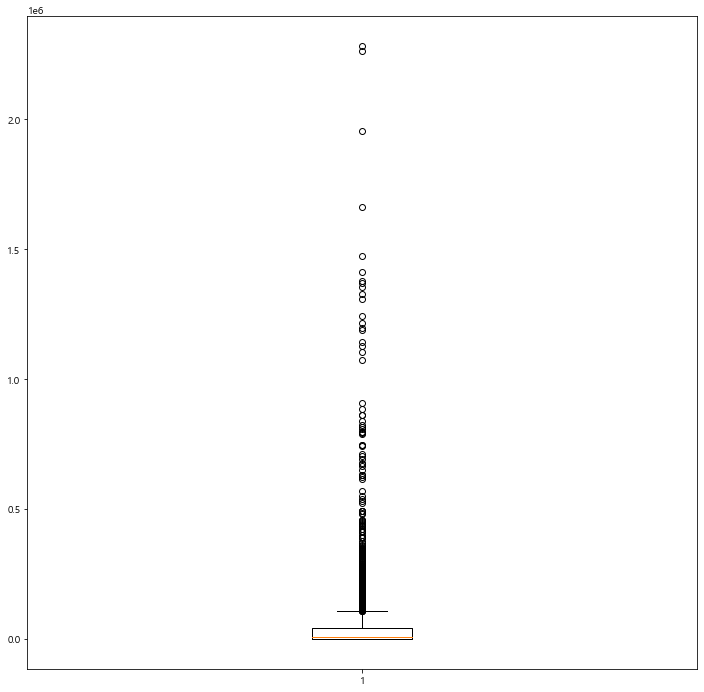

In [150]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.boxplot(yong_analysis[yong_analysis['total_volume'] != yong_analysis['total_volume'].max()]['total_volume'])
#plt.ylim(0,yong_analysis['total_volume'].max())

In [152]:
yong_analysis[yong_analysis['ws_cnt'] >= 10].sort_values(['total_fp', 'guarantee_score', 'fail_percent'], ascending=False).head(20)

,gid,ws_cnt,smbiz_yn_cnt,age10_ratio,age20_ratio,age30_ratio,age40_ratio,age50_ratio,age60_ratio,age70_ratio,indcd_a_yn,indcd_b_yn,indcd_c_yn,indcd_d_yn,indcd_e_yn,indcd_f_yn,indcd_g_yn,indcd_h_yn,indcd_i_yn,indcd_j_yn,indcd_k_yn,indcd_l_yn,indcd_m_yn,indcd_n_yn,indcd_o_yn,indcd_p_yn,indcd_q_yn,indcd_r_yn,indcd_s_yn,indcd_t_yn,indcd_u_yn,geometry,Ah,Jum,Ju,Rest,total_volume,guarantee_score,fail_percent,high_volume,val_total_pop,val_working_pop,total_fp
525,다사65aa22ab,54,37,0.220,4.940,16.060,34.520,22.780,9.660,7.720,NaN,nan,Y,NaN,nan,NaN,Y,NaN,Y,NaN,NaN,NaN,NaN,NaN,nan,Y,Y,NaN,Y,NaN,nan,"MULTIPOLYGON (((127.105087278346 37.29854639003275, 127.1050754962351 37.30079982957744, 127.1078963250024 37.30080920871177, 127.1079080229625 37.29855576840663, 127.105087278346 37.29854639003275)))",63686.720,60330.930,73101.260,86754.030,301663,4.963,1.852,5586.352,0.000,0.000,283872.940
362,다사64aa24bb,325,159,3.140,7.610,13.940,42.390,19.260,4.820,4.440,NaN,nan,Y,NaN,nan,NaN,Y,NaN,Y,NaN,NaN,Y,Y,Y,nan,Y,Y,Y,Y,Y,nan,"MULTIPOLYGON (((127.0936830652411 37.32104252992364, 127.0936709330328 37.32329595773628, 127.096492598516 37.32330561361251, 127.0965046464804 37.32105218501716, 127.0936830652411 37.32104252992364)))",52232.120,53899.660,64148.280,64338.820,4964721,4.757,4.308,15276.065,476.000,404.000,234618.880
485,다사64bb25aa,22,14,0.740,11.290,14.630,24.030,17.690,8.640,3.780,NaN,nan,Y,NaN,nan,NaN,Y,NaN,Y,NaN,NaN,NaN,NaN,Y,nan,Y,Y,NaN,NaN,NaN,nan,"MULTIPOLYGON (((127.1021359334963 37.32332472351398, 127.102124052698 37.32557815279482, 127.10494580643 37.32558760758625, 127.1049576029746 37.32333417753904, 127.1021359334963 37.32332472351398)))",46276.440,59536.630,60958.960,61182.290,193805,4.955,0.000,8809.318,0.000,0.000,227954.320
527,다사65aa22bb,12,8,0.300,5.940,19.900,34.880,19.490,7.010,5.940,NaN,nan,NaN,NaN,nan,NaN,Y,NaN,Y,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,Y,Y,NaN,nan,"MULTIPOLYGON (((127.1050637128128 37.30305326825881, 127.105051928079 37.30530670607686, 127.1078729251761 37.3053160867322, 127.1078846257404 37.30306264815361, 127.1050637128128 37.30305326825881)))",41970.280,46074.670,51212.160,63361.450,108013,4.667,0.000,9001.083,324.000,232.000,202618.560
535,다사65aa25aa,16,13,0.170,6.740,23.270,25.240,22.680,8.990,6.220,NaN,nan,Y,NaN,nan,NaN,Y,NaN,Y,NaN,NaN,NaN,NaN,Y,nan,NaN,NaN,NaN,NaN,NaN,nan,"MULTIPOLYGON (((127.1049576029746 37.32333417753904, 127.10494580643 37.32558760758625, 127.1077675614751 37.32559699508832, 127.1077792737658 37.32334356428017, 127.1049576029746 37.32333417753904)))",41063.670,52235.560,54141.630,52338.490,101035,4.750,0.000,6314.688,91.000,76.000,199779.350
583,다사65ab24ba,131,79,2.030,17.240,20.050,27.280,15.490,4.120,2.020,NaN,nan,Y,NaN,nan,NaN,Y,NaN,Y,Y,NaN,Y,Y,Y,nan,Y,Y,Y,Y,NaN,nan,"MULTIPOLYGON (((127.1078026944365 37.31883670007354, 127.1077909847528 37.32109013260858, 127.1106125726028 37.32109945131027, 127.1106241980512 37.31884601801985, 127.1078026944365 37.31883670007354)))",32851.770,36962.630,43997.980,47004.070,864256,3.939,3.817,6597.374,1065.000,802.000,160816.450
124,다사61bb22aa,253,156,1.210,9.120,25.200,35.010,15.160,4.190,1.640,NaN,nan,Y,NaN,nan,NaN,Y,NaN,Y,Y,NaN,Y,Y,Y,nan,Y,Y,Y,Y,NaN,nan,"MULTIPOLYGON (((127.0684305956869 37.29616492380271, 127.0684177210622 37.29841835382963, 127.0712384479023 37.29842860610697, 127.0712512383876 37.2961751752488, 127.0684305956869 37.29616492380271)))",33424.920,32683.460,43741.510,50225.300,2282297,3.957,6.719,9020.937,1630.000,1288.000,160075.190
374,다사64ab13bb,21,13,0.160,4.390,19.350,23.370,15.810,4.800,1.740,NaN,nan,NaN,NaN,nan,NaN,Y,NaN,Y,Y,NaN,NaN,NaN,Y,nan,Y,NaN,Y,Y,NaN,nan,"MULTIPOLYGON (((127.0970334316567 37.22190047210592, 127.0970214425434 37.22415393868273, 127.0998394114821 37.22416349311973, 127.0998513167629 37.22191002576768, 127.0970334316567 37.22190047210592)))",34682.610,36099.360,40075.040,47544.020,159156,5.333,0.000,7578.857,17.000,15.000,158401.030
585,다사65ab25aa,17,8,0.680,7.100,30.020,31.560,16.420,5.180,2.970,NaN,nan,N

In [154]:
import folium

center = (37.2410864, 127.1775537)
zoom = 11

m = folium.Map(location=center,
               zoom_start=zoom,
               tiles='http://api.vworld.kr/req/wmts/1.0.0/8A493903-DE32-3DB0-AD78-4ECBE52B86D3/Base/{z}/{y}/{x}.png',
               attr='용인시'
               )
style1 = {'fillColor': '#DE2345', 'lineColor': '#DE2345'}
style2 = {'fillColor': '#23DE9B', 'lineColor': '#23DE9B'}

folium.GeoJson(gpd_yong_analysis).add_to(m)
#folium.GeoJson(yi_1, style_function=lambda x: style2).add_to(m)
for n in yi_1.index:
    folium.CircleMarker([yi_1['위도'][n], yi_1['경도'][n]], color='red').add_to(m)

m.save('output/html.html')

NameError: name 'gpd_yong_analysis' is not defined

### 유동인구 top10

In [155]:
fp_top10 = yong_analysis.sort_values(['total_fp', 'guarantee_score', 'fail_percent'], ascending=False).head(10)
fp_top10

,gid,ws_cnt,smbiz_yn_cnt,age10_ratio,age20_ratio,age30_ratio,age40_ratio,age50_ratio,age60_ratio,age70_ratio,indcd_a_yn,indcd_b_yn,indcd_c_yn,indcd_d_yn,indcd_e_yn,indcd_f_yn,indcd_g_yn,indcd_h_yn,indcd_i_yn,indcd_j_yn,indcd_k_yn,indcd_l_yn,indcd_m_yn,indcd_n_yn,indcd_o_yn,indcd_p_yn,indcd_q_yn,indcd_r_yn,indcd_s_yn,indcd_t_yn,indcd_u_yn,geometry,Ah,Jum,Ju,Rest,total_volume,guarantee_score,fail_percent,high_volume,val_total_pop,val_working_pop,total_fp
525,다사65aa22ab,54,37,0.220,4.940,16.060,34.520,22.780,9.660,7.720,NaN,nan,Y,NaN,nan,NaN,Y,NaN,Y,NaN,NaN,NaN,NaN,NaN,nan,Y,Y,NaN,Y,NaN,nan,"MULTIPOLYGON (((127.105087278346 37.29854639003275, 127.1050754962351 37.30079982957744, 127.1078963250024 37.30080920871177, 127.1079080229625 37.29855576840663, 127.105087278346 37.29854639003275)))",63686.720,60330.930,73101.260,86754.030,301663,4.963,1.852,5586.352,0.000,0.000,283872.940
362,다사64aa24bb,325,159,3.140,7.610,13.940,42.390,19.260,4.820,4.440,NaN,nan,Y,NaN,nan,NaN,Y,NaN,Y,NaN,NaN,Y,Y,Y,nan,Y,Y,Y,Y,Y,nan,"MULTIPOLYGON (((127.0936830652411 37.32104252992364, 127.0936709330328 37.32329595773628, 127.096492598516 37.32330561361251, 127.0965046464804 37.32105218501716, 127.0936830652411 37.32104252992364)))",52232.120,53899.660,64148.280,64338.820,4964721,4.757,4.308,15276.065,476.000,404.000,234618.880
485,다사64bb25aa,22,14,0.740,11.290,14.630,24.030,17.690,8.640,3.780,NaN,nan,Y,NaN,nan,NaN,Y,NaN,Y,NaN,NaN,NaN,NaN,Y,nan,Y,Y,NaN,NaN,NaN,nan,"MULTIPOLYGON (((127.1021359334963 37.32332472351398, 127.102124052698 37.32557815279482, 127.10494580643 37.32558760758625, 127.1049576029746 37.32333417753904, 127.1021359334963 37.32332472351398)))",46276.440,59536.630,60958.960,61182.290,193805,4.955,0.000,8809.318,0.000,0.000,227954.320
527,다사65aa22bb,12,8,0.300,5.940,19.900,34.880,19.490,7.010,5.940,NaN,nan,NaN,NaN,nan,NaN,Y,NaN,Y,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,Y,Y,NaN,nan,"MULTIPOLYGON (((127.1050637128128 37.30305326825881, 127.105051928079 37.30530670607686, 127.1078729251761 37.3053160867322, 127.1078846257404 37.30306264815361, 127.1050637128128 37.30305326825881)))",41970.280,46074.670,51212.160,63361.450,108013,4.667,0.000,9001.083,324.000,232.000,202618.560
535,다사65aa25aa,16,13,0.170,6.740,23.270,25.240,22.680,8.990,6.220,NaN,nan,Y,NaN,nan,NaN,Y,NaN,Y,NaN,NaN,NaN,NaN,Y,nan,NaN,NaN,NaN,NaN,NaN,nan,"MULTIPOLYGON (((127.1049576029746 37.32333417753904, 127.10494580643 37.32558760758625, 127.1077675614751 37.32559699508832, 127.1077792737658 37.32334356428017, 127.1049576029746 37.32333417753904)))",41063.670,52235.560,54141.630,52338.490,101035,4.750,0.000,6314.688,91.000,76.000,199779.350
470,다사64bb19aa,8,5,0.210,10.520,17.660,16.950,17.070,5.720,12.810,NaN,nan,Y,NaN,nan,NaN,Y,NaN,Y,NaN,NaN,NaN,Y,NaN,nan,NaN,NaN,NaN,NaN,NaN,nan,"MULTIPOLYGON (((127.1024206763244 37.26924216175335, 127.1024088272184 37.2714956117541, 127.1052285614454 37.2715050481648, 127.1052403265223 37.26925159739875, 127.1024206763244 37.26924216175335)))",41161.920,38885.530,43218.030,60416.450,22172,4.250,12.500,2771.500,230.000,189.000,183681.930
583,다사65ab24ba,131,79,2.030,17.240,20.050,27.280,15.490,4.120,2.020,NaN,nan,Y,NaN,nan,NaN,Y,NaN,Y,Y,NaN,Y,Y,Y,nan,Y,Y,Y,Y,NaN,nan,"MULTIPOLYGON (((127.1078026944365 37.31883670007354, 127.1077909847528 37.32109013260858, 127.1106125726028 37.32109945131027, 127.1106241980512 37.31884601801985, 127.1078026944365 37.31883670007354)))",32851.770,36962.630,43997.980,47004.070,864256,3.939,3.817,6597.374,1065.000,802.000,160816.450
124,다사61bb22aa,253,156,1.210,9.120,25.200,35.010,15.160,4.190,1.640,NaN,nan,Y,NaN,nan,NaN,Y,NaN,Y,Y,NaN,Y,Y,Y,nan,Y,Y,Y,Y,NaN,nan,"MULTIPOLYGON (((127.0684305956869 37.29616492380271, 127.0684177210622 37.29841835382963, 127.0712384479023 37.29842860610697, 127.0712512383876 37.2961751752488, 127.0684305956869 37.29616492380271)))",33424.920,32683.460,43741.510,50225.300,2282297,3.957,6.719,9020.937,1630.000,1288.000,160075.190
374,다사64ab13bb,21,13,0.160,4.390,19.350,23.370,15.810,4.800,1.740,Na

### 총인구 top10

In [156]:
yong_analysis = yong_analysis.iloc[:, :-1]

In [157]:
tot_pop_top10 = yong_analysis.sort_values(['total_pop', 'guarantee_score', 'fail_percent'], ascending=False).head(10)
tot_pop_top10

,gid,ws_cnt,smbiz_yn_cnt,age10_ratio,age20_ratio,age30_ratio,age40_ratio,age50_ratio,age60_ratio,age70_ratio,indcd_a_yn,indcd_b_yn,indcd_c_yn,indcd_d_yn,indcd_e_yn,indcd_f_yn,indcd_g_yn,indcd_h_yn,indcd_i_yn,indcd_j_yn,indcd_k_yn,indcd_l_yn,indcd_m_yn,indcd_n_yn,indcd_o_yn,indcd_p_yn,indcd_q_yn,indcd_r_yn,indcd_s_yn,indcd_t_yn,indcd_u_yn,geometry,Ah,Jum,Ju,Rest,total_volume,guarantee_score,fail_percent,high_volume,val_total_pop,val_working_pop
255,다사63aa23bb,9,7,2.380,3.080,16.280,39.900,12.580,11.350,2.530,NaN,nan,NaN,NaN,nan,NaN,Y,NaN,Y,NaN,NaN,NaN,NaN,NaN,nan,Y,NaN,NaN,NaN,NaN,nan,"MULTIPOLYGON (((127.0824466167342 37.31198952962229, 127.0824341531018 37.31424295770492, 127.0852554762102 37.31425287949685, 127.0852678556368 37.3119994506099, 127.0824466167342 37.31198952962229)))",7945.330,8924.330,8892.280,12246.300,3391,3.556,0.000,376.778,5526.000,3947.000
699,다사66ab19ab,10,8,0.430,4.450,51.720,36.640,3.110,0.830,1.380,NaN,nan,NaN,NaN,nan,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,Y,NaN,Y,NaN,NaN,nan,"MULTIPOLYGON (((127.119327252034 37.27155122283803, 127.1193159058419 37.27380467648607, 127.1221357318242 37.27381371067664, 127.122146993977 37.27156025629594, 127.119327252034 37.27155122283803)))",915.570,1107.330,1277.810,1353.400,9055,2.700,0.000,905.500,5510.000,3957.000
329,다사63bb23bb,66,57,1.580,4.300,18.720,43.740,17.000,4.450,3.300,NaN,nan,Y,NaN,nan,NaN,Y,Y,Y,Y,NaN,NaN,Y,NaN,nan,Y,Y,Y,Y,NaN,nan,"MULTIPOLYGON (((127.0909103375657 37.31201909081716, 127.0908981265512 37.31427252129639, 127.0937194537652 37.31428224130379, 127.0937315805734 37.3120288100366, 127.0909103375657 37.31201909081716)))",7860.700,8791.490,11509.100,19791.730,323127,4.727,6.061,4895.864,4299.000,3045.000
540,다사65aa26ab,32,28,0.270,4.980,28.230,37.260,15.430,6.790,3.200,NaN,nan,NaN,NaN,nan,NaN,Y,NaN,Y,NaN,NaN,Y,NaN,Y,nan,Y,Y,Y,Y,NaN,nan,"MULTIPOLYGON (((127.1048986071196 37.33460131913976, 127.1048868040082 37.33685474486921, 127.1077089804636 37.33686413617658, 127.1077206992742 37.33461070968598, 127.1048986071196 37.33460131913976)))",7045.990,7559.860,9551.240,12957.430,71474,4.906,3.125,2233.562,4011.000,2938.000
256,다사63aa24aa,43,35,1.040,3.360,30.340,47.720,10.010,2.810,1.540,NaN,nan,Y,NaN,nan,NaN,Y,NaN,Y,NaN,NaN,NaN,NaN,Y,nan,Y,Y,Y,Y,NaN,nan,"MULTIPOLYGON (((127.0824341531018 37.31424295770492, 127.0824216880821 37.31649638492375, 127.0852430954056 37.31650630752004, 127.0852554762102 37.31425287949685, 127.0824341531018 37.31424295770492)))",3744.980,4195.110,4961.660,6892.570,271358,3.465,0.000,6310.651,3901.000,2792.000
215,다사62ba23ab,11,10,0.440,4.390,12.790,33.110,20.270,5.730,1.800,NaN,nan,NaN,NaN,nan,NaN,Y,NaN,Y,NaN,Y,NaN,NaN,NaN,nan,Y,NaN,NaN,Y,NaN,nan,"MULTIPOLYGON (((127.0768294029696 37.30746263037285, 127.0768167737375 37.30971605855817, 127.0796379256604 37.30972611324219, 127.0796504707056 37.30747268424173, 127.0768294029696 37.30746263037285)))",4016.200,4305.340,5638.810,7256.230,15432,5.182,0.000,1402.909,3581.000,2527.000
349,다사64aa18bb,46,39,0.320,4.060,27.730,35.140,16.990,7.450,3.580,NaN,nan,Y,NaN,nan,NaN,Y,NaN,Y,NaN,NaN,NaN,NaN,Y,nan,Y,Y,Y,Y,NaN,nan,"MULTIPOLYGON (((127.0939738335252 37.26696000336401, 127.0939617336796 37.26921345189943, 127.0967813798937 37.26922308900359, 127.09679339572 37.26696963968659, 127.0939738335252 37.26696000336401)))",9959.590,10156.300,11382.550,14100.250,228962,4.891,0.000,4977.435,3480.000,2571.000
254,다사63aa23ba,7,3,0.400,3.080,31.770,40.880,12.350,4.090,1.830,NaN,nan,NaN,NaN,nan,NaN,NaN,NaN,Y,NaN,NaN,NaN,Y,NaN,nan,Y,Y,NaN,NaN,NaN,nan,"MULTIPOLYGON (((127.0824590789795 37.30973610067592, 127.0824466167342 37.31198952962229, 127.0852678556368 37.3119994506099, 127.0852802336857 37.30974602085925, 127.0824590789795 37.30973610067592)))",4913.540,5707.230,6820.360,7676.430,81847,4.429,0.000,11692.429,3281.000,2383.000
299,다사63ba23ba,6,4,0.140,0.840,18.740,42.930,14.750,6.720,7.280,NaN,nan,Y,NaN,nan,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,Y,NaN,NaN,Y,NaN,nan,"MULTIPOLYGON (((127.08810138

In [158]:
print(yong_analysis['guarantee_score'].median())
print(yong_analysis['guarantee_score'].mean())

print(yong_analysis['fail_percent'].mean())

4.764705882352942
4.616703531139567
2.5181108861639854


In [159]:
yong_analysis.sort_values(['total_pop', 'guarantee_score', 'fail_percent'], ascending=False).head(10)

,gid,ws_cnt,smbiz_yn_cnt,age10_ratio,age20_ratio,age30_ratio,age40_ratio,age50_ratio,age60_ratio,age70_ratio,indcd_a_yn,indcd_b_yn,indcd_c_yn,indcd_d_yn,indcd_e_yn,indcd_f_yn,indcd_g_yn,indcd_h_yn,indcd_i_yn,indcd_j_yn,indcd_k_yn,indcd_l_yn,indcd_m_yn,indcd_n_yn,indcd_o_yn,indcd_p_yn,indcd_q_yn,indcd_r_yn,indcd_s_yn,indcd_t_yn,indcd_u_yn,geometry,Ah,Jum,Ju,Rest,total_volume,guarantee_score,fail_percent,high_volume,val_total_pop,val_working_pop
255,다사63aa23bb,9,7,2.380,3.080,16.280,39.900,12.580,11.350,2.530,NaN,nan,NaN,NaN,nan,NaN,Y,NaN,Y,NaN,NaN,NaN,NaN,NaN,nan,Y,NaN,NaN,NaN,NaN,nan,"MULTIPOLYGON (((127.0824466167342 37.31198952962229, 127.0824341531018 37.31424295770492, 127.0852554762102 37.31425287949685, 127.0852678556368 37.3119994506099, 127.0824466167342 37.31198952962229)))",7945.330,8924.330,8892.280,12246.300,3391,3.556,0.000,376.778,5526.000,3947.000
699,다사66ab19ab,10,8,0.430,4.450,51.720,36.640,3.110,0.830,1.380,NaN,nan,NaN,NaN,nan,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,Y,NaN,Y,NaN,NaN,nan,"MULTIPOLYGON (((127.119327252034 37.27155122283803, 127.1193159058419 37.27380467648607, 127.1221357318242 37.27381371067664, 127.122146993977 37.27156025629594, 127.119327252034 37.27155122283803)))",915.570,1107.330,1277.810,1353.400,9055,2.700,0.000,905.500,5510.000,3957.000
329,다사63bb23bb,66,57,1.580,4.300,18.720,43.740,17.000,4.450,3.300,NaN,nan,Y,NaN,nan,NaN,Y,Y,Y,Y,NaN,NaN,Y,NaN,nan,Y,Y,Y,Y,NaN,nan,"MULTIPOLYGON (((127.0909103375657 37.31201909081716, 127.0908981265512 37.31427252129639, 127.0937194537652 37.31428224130379, 127.0937315805734 37.3120288100366, 127.0909103375657 37.31201909081716)))",7860.700,8791.490,11509.100,19791.730,323127,4.727,6.061,4895.864,4299.000,3045.000
540,다사65aa26ab,32,28,0.270,4.980,28.230,37.260,15.430,6.790,3.200,NaN,nan,NaN,NaN,nan,NaN,Y,NaN,Y,NaN,NaN,Y,NaN,Y,nan,Y,Y,Y,Y,NaN,nan,"MULTIPOLYGON (((127.1048986071196 37.33460131913976, 127.1048868040082 37.33685474486921, 127.1077089804636 37.33686413617658, 127.1077206992742 37.33461070968598, 127.1048986071196 37.33460131913976)))",7045.990,7559.860,9551.240,12957.430,71474,4.906,3.125,2233.562,4011.000,2938.000
256,다사63aa24aa,43,35,1.040,3.360,30.340,47.720,10.010,2.810,1.540,NaN,nan,Y,NaN,nan,NaN,Y,NaN,Y,NaN,NaN,NaN,NaN,Y,nan,Y,Y,Y,Y,NaN,nan,"MULTIPOLYGON (((127.0824341531018 37.31424295770492, 127.0824216880821 37.31649638492375, 127.0852430954056 37.31650630752004, 127.0852554762102 37.31425287949685, 127.0824341531018 37.31424295770492)))",3744.980,4195.110,4961.660,6892.570,271358,3.465,0.000,6310.651,3901.000,2792.000
215,다사62ba23ab,11,10,0.440,4.390,12.790,33.110,20.270,5.730,1.800,NaN,nan,NaN,NaN,nan,NaN,Y,NaN,Y,NaN,Y,NaN,NaN,NaN,nan,Y,NaN,NaN,Y,NaN,nan,"MULTIPOLYGON (((127.0768294029696 37.30746263037285, 127.0768167737375 37.30971605855817, 127.0796379256604 37.30972611324219, 127.0796504707056 37.30747268424173, 127.0768294029696 37.30746263037285)))",4016.200,4305.340,5638.810,7256.230,15432,5.182,0.000,1402.909,3581.000,2527.000
349,다사64aa18bb,46,39,0.320,4.060,27.730,35.140,16.990,7.450,3.580,NaN,nan,Y,NaN,nan,NaN,Y,NaN,Y,NaN,NaN,NaN,NaN,Y,nan,Y,Y,Y,Y,NaN,nan,"MULTIPOLYGON (((127.0939738335252 37.26696000336401, 127.0939617336796 37.26921345189943, 127.0967813798937 37.26922308900359, 127.09679339572 37.26696963968659, 127.0939738335252 37.26696000336401)))",9959.590,10156.300,11382.550,14100.250,228962,4.891,0.000,4977.435,3480.000,2571.000
254,다사63aa23ba,7,3,0.400,3.080,31.770,40.880,12.350,4.090,1.830,NaN,nan,NaN,NaN,nan,NaN,NaN,NaN,Y,NaN,NaN,NaN,Y,NaN,nan,Y,Y,NaN,NaN,NaN,nan,"MULTIPOLYGON (((127.0824590789795 37.30973610067592, 127.0824466167342 37.31198952962229, 127.0852678556368 37.3119994506099, 127.0852802336857 37.30974602085925, 127.0824590789795 37.30973610067592)))",4913.540,5707.230,6820.360,7676.430,81847,4.429,0.000,11692.429,3281.000,2383.000
299,다사63ba23ba,6,4,0.140,0.840,18.740,42.930,14.750,6.720,7.280,NaN,nan,Y,NaN,nan,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,Y,NaN,NaN,Y,NaN,nan,"MULTIPOLYGON (((127.08810138

In [160]:
yong_analysis.sort_values('total_pop', ascending=False).head(10)

,gid,ws_cnt,smbiz_yn_cnt,age10_ratio,age20_ratio,age30_ratio,age40_ratio,age50_ratio,age60_ratio,age70_ratio,indcd_a_yn,indcd_b_yn,indcd_c_yn,indcd_d_yn,indcd_e_yn,indcd_f_yn,indcd_g_yn,indcd_h_yn,indcd_i_yn,indcd_j_yn,indcd_k_yn,indcd_l_yn,indcd_m_yn,indcd_n_yn,indcd_o_yn,indcd_p_yn,indcd_q_yn,indcd_r_yn,indcd_s_yn,indcd_t_yn,indcd_u_yn,geometry,Ah,Jum,Ju,Rest,total_volume,guarantee_score,fail_percent,high_volume,val_total_pop,val_working_pop
255,다사63aa23bb,9,7,2.380,3.080,16.280,39.900,12.580,11.350,2.530,NaN,nan,NaN,NaN,nan,NaN,Y,NaN,Y,NaN,NaN,NaN,NaN,NaN,nan,Y,NaN,NaN,NaN,NaN,nan,"MULTIPOLYGON (((127.0824466167342 37.31198952962229, 127.0824341531018 37.31424295770492, 127.0852554762102 37.31425287949685, 127.0852678556368 37.3119994506099, 127.0824466167342 37.31198952962229)))",7945.330,8924.330,8892.280,12246.300,3391,3.556,0.000,376.778,5526.000,3947.000
699,다사66ab19ab,10,8,0.430,4.450,51.720,36.640,3.110,0.830,1.380,NaN,nan,NaN,NaN,nan,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,Y,NaN,Y,NaN,NaN,nan,"MULTIPOLYGON (((127.119327252034 37.27155122283803, 127.1193159058419 37.27380467648607, 127.1221357318242 37.27381371067664, 127.122146993977 37.27156025629594, 127.119327252034 37.27155122283803)))",915.570,1107.330,1277.810,1353.400,9055,2.700,0.000,905.500,5510.000,3957.000
329,다사63bb23bb,66,57,1.580,4.300,18.720,43.740,17.000,4.450,3.300,NaN,nan,Y,NaN,nan,NaN,Y,Y,Y,Y,NaN,NaN,Y,NaN,nan,Y,Y,Y,Y,NaN,nan,"MULTIPOLYGON (((127.0909103375657 37.31201909081716, 127.0908981265512 37.31427252129639, 127.0937194537652 37.31428224130379, 127.0937315805734 37.3120288100366, 127.0909103375657 37.31201909081716)))",7860.700,8791.490,11509.100,19791.730,323127,4.727,6.061,4895.864,4299.000,3045.000
540,다사65aa26ab,32,28,0.270,4.980,28.230,37.260,15.430,6.790,3.200,NaN,nan,NaN,NaN,nan,NaN,Y,NaN,Y,NaN,NaN,Y,NaN,Y,nan,Y,Y,Y,Y,NaN,nan,"MULTIPOLYGON (((127.1048986071196 37.33460131913976, 127.1048868040082 37.33685474486921, 127.1077089804636 37.33686413617658, 127.1077206992742 37.33461070968598, 127.1048986071196 37.33460131913976)))",7045.990,7559.860,9551.240,12957.430,71474,4.906,3.125,2233.562,4011.000,2938.000
256,다사63aa24aa,43,35,1.040,3.360,30.340,47.720,10.010,2.810,1.540,NaN,nan,Y,NaN,nan,NaN,Y,NaN,Y,NaN,NaN,NaN,NaN,Y,nan,Y,Y,Y,Y,NaN,nan,"MULTIPOLYGON (((127.0824341531018 37.31424295770492, 127.0824216880821 37.31649638492375, 127.0852430954056 37.31650630752004, 127.0852554762102 37.31425287949685, 127.0824341531018 37.31424295770492)))",3744.980,4195.110,4961.660,6892.570,271358,3.465,0.000,6310.651,3901.000,2792.000
215,다사62ba23ab,11,10,0.440,4.390,12.790,33.110,20.270,5.730,1.800,NaN,nan,NaN,NaN,nan,NaN,Y,NaN,Y,NaN,Y,NaN,NaN,NaN,nan,Y,NaN,NaN,Y,NaN,nan,"MULTIPOLYGON (((127.0768294029696 37.30746263037285, 127.0768167737375 37.30971605855817, 127.0796379256604 37.30972611324219, 127.0796504707056 37.30747268424173, 127.0768294029696 37.30746263037285)))",4016.200,4305.340,5638.810,7256.230,15432,5.182,0.000,1402.909,3581.000,2527.000
349,다사64aa18bb,46,39,0.320,4.060,27.730,35.140,16.990,7.450,3.580,NaN,nan,Y,NaN,nan,NaN,Y,NaN,Y,NaN,NaN,NaN,NaN,Y,nan,Y,Y,Y,Y,NaN,nan,"MULTIPOLYGON (((127.0939738335252 37.26696000336401, 127.0939617336796 37.26921345189943, 127.0967813798937 37.26922308900359, 127.09679339572 37.26696963968659, 127.0939738335252 37.26696000336401)))",9959.590,10156.300,11382.550,14100.250,228962,4.891,0.000,4977.435,3480.000,2571.000
254,다사63aa23ba,7,3,0.400,3.080,31.770,40.880,12.350,4.090,1.830,NaN,nan,NaN,NaN,nan,NaN,NaN,NaN,Y,NaN,NaN,NaN,Y,NaN,nan,Y,Y,NaN,NaN,NaN,nan,"MULTIPOLYGON (((127.0824590789795 37.30973610067592, 127.0824466167342 37.31198952962229, 127.0852678556368 37.3119994506099, 127.0852802336857 37.30974602085925, 127.0824590789795 37.30973610067592)))",4913.540,5707.230,6820.360,7676.430,81847,4.429,0.000,11692.429,3281.000,2383.000
299,다사63ba23ba,6,4,0.140,0.840,18.740,42.930,14.750,6.720,7.280,NaN,nan,Y,NaN,nan,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,Y,NaN,NaN,Y,NaN,nan,"MULTIPOLYGON (((127.08810138

In [161]:
yong_analysis[yong_analysis[['age20_ratio', 'age30_ratio']]].sort_values(['age20_ratio', 'age30_ratio'], ascending=False).head(10)

ValueError: Boolean array expected for the condition, not float64

In [162]:
yong_analysis.to_csv('../yongin/yong_analysis.csv')

# coordinates 변환을 위한 프레임 병합과정

In [167]:
yi_16_new = yi_16[['gid', 'geometry']]
yongsales = pd.merge(yi_17, yi_16_new, on='gid', how = 'left')
yongsales['coordinates'] = yongsales['geometry'].apply(multipolygon_to_coordinates)

In [168]:
for i in range(len(yongsales['coordinates'])):
    del yongsales['coordinates'][i][-1]

### yong_analysis 격자별 yi_1[['위도','경도']] 분류

In [174]:
yi_1['gid'] = ''

In [178]:
from tqdm import tqdm_notebook

for i in tqdm_notebook(range(len(yongsales))):
    for j in range(len(yi_1)):
        if (yongsales['coordinates'][i][0][0] < yi_1['경도'][j]) & (yi_1['경도'][j] < yongsales['coordinates'][i][2][0]):
            if (yongsales['coordinates'][i][0][1] < yi_1['위도'][j]) & (yi_1['위도'][j] < yongsales['coordinates'][i][2][1]):
                yi_1['gid'][j] = yongsales['gid'][i]

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


  0%|          | 0/2257 [00:00<?, ?it/s]

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [181]:
yi_1['gid'].value_counts()

              1567
다사64aa24bb    591 
다사65bb24ba    583 
다사65ab25aa    567 
다사64ab25aa    547 
             ...  
다사70ab03bb    1   
다사88ab08ab    1   
다사75ab13ba    1   
다사72ab20aa    1   
다사84ba10ab    1   
Name: gid, Length: 1904, dtype: int64

In [182]:
yong_analysis[yong_analysis['gid'] == '다사64aa24bb']

,gid,ws_cnt,smbiz_yn_cnt,age10_ratio,age20_ratio,age30_ratio,age40_ratio,age50_ratio,age60_ratio,age70_ratio,indcd_a_yn,indcd_b_yn,indcd_c_yn,indcd_d_yn,indcd_e_yn,indcd_f_yn,indcd_g_yn,indcd_h_yn,indcd_i_yn,indcd_j_yn,indcd_k_yn,indcd_l_yn,indcd_m_yn,indcd_n_yn,indcd_o_yn,indcd_p_yn,indcd_q_yn,indcd_r_yn,indcd_s_yn,indcd_t_yn,indcd_u_yn,geometry,Ah,Jum,Ju,Rest,total_volume,guarantee_score,fail_percent,high_volume,val_total_pop,val_working_pop
362,다사64aa24bb,325,159,3.140,7.610,13.940,42.390,19.260,4.820,4.440,NaN,nan,Y,NaN,nan,NaN,Y,NaN,Y,NaN,NaN,Y,Y,Y,nan,Y,Y,Y,Y,Y,nan,"MULTIPOLYGON (((127.0936830652411 37.32104252992364, 127.0936709330328 37.32329595773628, 127.096492598516 37.32330561361251, 127.0965046464804 37.32105218501716, 127.0936830652411 37.32104252992364)))",52232.120,53899.660,64148.280,64338.820,4964721,4.757,4.308,15276.065,476.000,404.000


In [183]:
yi_1[yi_1['gid'] == '다사64aa24bb']

,대분류코드,중분류코드,소분류코드,표준산업분류코드,표준산업분류명,행정동코드,행정동명,도로명주소,경도,위도,gid
75,F,F01,F01A01,S96112,두발미용업,4146552000,풍덕천2동,경기도 용인시 수지구 수지로296번길 51-5,127.094,37.322,다사64aa24bb
85,D,D18,D18A04,G47822,안경 소매업,4146552000,풍덕천2동,경기도 용인시 수지구 풍덕천로 119,127.095,37.323,다사64aa24bb
91,D,D18,D18A02,G47312,통신기기 소매업,4146552000,풍덕천2동,경기도 용인시 수지구 수지로296번길 51-2,127.095,37.321,다사64aa24bb
121,D,D05,D05A07,NaN,NaN,4146552000,풍덕천2동,경기도 용인시 수지구 풍덕천로96번길 3-15,127.094,37.321,다사64aa24bb
228,R,R05,R05A01,P85620,예술 학원,4146552000,풍덕천2동,경기도 용인시 수지구 수지로296번길 51-10,127.095,37.322,다사64aa24bb
...,...,...,...,...,...,...,...,...,...,...,...
39163,Q,Q12,Q12A01,I56220,비알콜 음료점업,4146552000,풍덕천2동,경기도 용인시 수지구 풍덕천로 116,127.095,37.322,다사64aa24bb
39202,Q,Q04,Q04A01,I56194,분식 및 김밥 전문점,4146552000,풍덕천2동,경기도 용인시 수지구 문정로7번길 12,127.095,37.321,다사64aa24bb
39328,D,D20,D20A04,G47812,의료용 기구 소매업,4146552000,풍덕천2동,경기도 용인시 수지구 풍덕천로 116,127.095,37.322,다사64aa24bb
39519,F,F13,F13A01,M71531,경영컨설팅업,4146552000,풍덕천2동,경기도 용인시 수지구 문정로7번길 14,127.095,37.321,다사64aa24bb


In [185]:
yi_1.to_csv('../yongin/yi_1_gid.csv')

# 점수 높은 격자로 분류

### 인구높은지역 탑10

In [137]:
yong_analysis.sort_values('total_pop', ascending = False).head(10)

,gid,ws_cnt,smbiz_yn_cnt,age10_ratio,age20_ratio,age30_ratio,age40_ratio,age50_ratio,age60_ratio,age70_ratio,Ah,Jum,Ju,Rest,total_volume,guarantee_score,fail_percent,high_volume,val_total_pop,val_working_pop,total_fp,age_2030_ratio
255,다사63aa23bb,9,7,2.38,3.08,16.28,39.90,12.58,11.35,2.53,7945.33,8924.33,8892.28,12246.30,3391,3.56,0.00,376.78,5526.00,3947.00,38008.24,19.36
699,다사66ab19ab,10,8,0.43,4.45,51.72,36.64,3.11,0.83,1.38,915.57,1107.33,1277.81,1353.40,9055,2.70,0.00,905.50,5510.00,3957.00,4654.11,56.17
329,다사63bb23bb,66,57,1.58,4.30,18.72,43.74,17.00,4.45,3.30,7860.70,8791.49,11509.10,19791.73,323127,4.73,6.06,4895.86,4299.00,3045.00,47953.02,23.02
540,다사65aa26ab,32,28,0.27,4.98,28.23,37.26,15.43,6.79,3.20,7045.99,7559.86,9551.24,12957.43,71474,4.91,3.12,2233.56,4011.00,2938.00,37114.52,33.21
256,다사63aa24aa,43,35,1.04,3.36,30.34,47.72,10.01,2.81,1.54,3744.98,4195.11,4961.66,6892.57,271358,3.47,0.00,6310.65,3901.00,2792.00,19794.32,33.70
215,다사62ba23ab,11,10,0.44,4.39,12.79,33.11,20.27,5.73,1.80,4016.20,4305.34,5638.81,7256.23,15432,5.18,0.00,1402.91,3581.00,2527.00,21216.58,17.18
349,다사64aa18bb,46,39,0.32,4.06,27.73,35.14,16.99,7.45,3.58,9959.59,10156.30,11382.55,14100.25,228962,4.89,0.00,4977.43,3480.00,2571.00,45598.69,31.79
254,다사63aa23ba,7,3,0.40,3.08,31.77,40.88,12.35,4.09,1.83,4913.54,5707.23,6820.36,7676.43,81847,4.43,0.00,11692.43,3281.00,2383.00,25117.56,34.85
299,다사63ba23ba,6,4,0.14,0.84,18.74,42.93,14.75,6.72,7.28,1821.55,2233.59,2873.68,4184.31,10762,5.17,0.00,1793.67,3266.00,2245.00,11113.13,19.58
616,다사65ba22ab,1,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1021.88,1193.13,1712.14,1993.94,451,6.00,0.00,451.00,3263.00,2277.00,5921.09,0.00


### 유동인구 높은 지역 탑10

In [138]:
yong_analysis.sort_values('total_fp', ascending = False).head(10)

,gid,ws_cnt,smbiz_yn_cnt,age10_ratio,age20_ratio,age30_ratio,age40_ratio,age50_ratio,age60_ratio,age70_ratio,Ah,Jum,Ju,Rest,total_volume,guarantee_score,fail_percent,high_volume,val_total_pop,val_working_pop,total_fp,age_2030_ratio
525,다사65aa22ab,54,37,0.22,4.94,16.06,34.52,22.78,9.66,7.72,63686.72,60330.93,73101.26,86754.03,301663,4.96,1.85,5586.35,0.00,0.00,283872.94,21.00
362,다사64aa24bb,325,159,3.14,7.61,13.94,42.39,19.26,4.82,4.44,52232.12,53899.66,64148.28,64338.82,4964721,4.76,4.31,15276.06,476.00,404.00,234618.88,21.55
485,다사64bb25aa,22,14,0.74,11.29,14.63,24.03,17.69,8.64,3.78,46276.44,59536.63,60958.96,61182.29,193805,4.95,0.00,8809.32,0.00,0.00,227954.32,25.92
527,다사65aa22bb,12,8,0.30,5.94,19.90,34.88,19.49,7.01,5.94,41970.28,46074.67,51212.16,63361.45,108013,4.67,0.00,9001.08,324.00,232.00,202618.56,25.84
535,다사65aa25aa,16,13,0.17,6.74,23.27,25.24,22.68,8.99,6.22,41063.67,52235.56,54141.63,52338.49,101035,4.75,0.00,6314.69,91.00,76.00,199779.35,30.01
470,다사64bb19aa,8,5,0.21,10.52,17.66,16.95,17.07,5.72,12.81,41161.92,38885.53,43218.03,60416.45,22172,4.25,12.50,2771.50,230.00,189.00,183681.93,28.18
583,다사65ab24ba,131,79,2.03,17.24,20.05,27.28,15.49,4.12,2.02,32851.77,36962.63,43997.98,47004.07,864256,3.94,3.82,6597.37,1065.00,802.00,160816.45,37.29
124,다사61bb22aa,253,156,1.21,9.12,25.20,35.01,15.16,4.19,1.64,33424.92,32683.46,43741.51,50225.30,2282297,3.96,6.72,9020.94,1630.00,1288.00,160075.19,34.32
374,다사64ab13bb,21,13,0.16,4.39,19.35,23.37,15.81,4.80,1.74,34682.61,36099.36,40075.04,47544.02,159156,5.33,0.00,7578.86,17.00,15.00,158401.03,23.74
585,다사65ab25aa,17,8,0.68,7.10,30.02,31.56,16.42,5.18,2.97,27499.62,42834.27,39368.21,33370.21,263765,4.94,0.00,15515.59,0.00,0.00,143072.31,37.12


### 20,30대의 매출이 높은 지역 탑10

In [61]:
yong_analysis['age_2030_ratio']=yong_analysis.loc[:,['age20_ratio','age30_ratio']].sum(axis = 1)

###

In [221]:
yong_analysis[yong_analysis['gid']=='다사62ab16ab']

,gid,ws_cnt,smbiz_yn_cnt,age10_ratio,age20_ratio,age30_ratio,age40_ratio,age50_ratio,age60_ratio,age70_ratio,Ah,Jum,Ju,Rest,total_volume,guarantee_score,fail_percent,high_volume,val_total_pop,val_working_pop,total_fp,age_2030_ratio,coffee_counts
174,다사62ab16ab,8,6,12.65,69.32,2.17,3.87,2.11,0.05,0.75,2084.37,1995.72,2113.75,2961.95,36754,2.88,12.50,4594.25,646.00,498.00,9155.79,71.49,0.00


In [132]:
yong_analysis['total_fp'].median()

4011.96

In [152]:
business_code[business_code['gid'] == '다사62ab16ab' ]

,gid,indcd_a_yn,indcd_b_yn,indcd_c_yn,indcd_d_yn,indcd_e_yn,indcd_f_yn,indcd_g_yn,indcd_h_yn,indcd_i_yn,indcd_j_yn,indcd_k_yn,indcd_l_yn,indcd_m_yn,indcd_n_yn,indcd_o_yn,indcd_p_yn,indcd_q_yn,indcd_r_yn,indcd_s_yn,indcd_t_yn,indcd_u_yn
174,다사62ab16ab,NaN,nan,NaN,NaN,nan,NaN,NaN,Y,Y,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,nan


In [151]:
yi_1_gid[yi_1_gid['gid'] == '다사62ab16ab']

,대분류코드,중분류코드,소분류코드,표준산업분류코드,표준산업분류명,행정동코드,행정동명,도로명주소,경도,위도,gid
4603,Q,Q09,Q09A02,I56219,기타 주점업,4146355000,서농동,경기도 용인시 기흥구 서그내로15번길 34,127.08,37.25,다사62ab16ab
6328,N,N02,N02A01,R91223,노래연습장 운영업,4146355000,서농동,경기도 용인시 기흥구 서그내로15번길 36,127.08,37.25,다사62ab16ab
9792,Q,Q09,Q09A01,I56219,기타 주점업,4146355000,서농동,경기도 용인시 기흥구 서그내로15번길 29,127.08,37.25,다사62ab16ab
10855,Q,Q01,Q01A01,I56111,한식 음식점업,4146355000,서농동,경기도 용인시 기흥구 서그내로15번길 36,127.08,37.25,다사62ab16ab
13014,Q,Q04,Q04A01,I56194,분식 및 김밥 전문점,4146355000,서농동,경기도 용인시 기흥구 서그내로15번길 29,127.08,37.25,다사62ab16ab
14007,Q,Q05,Q05A08,I56193,치킨 전문점,4146355000,서농동,경기도 용인시 기흥구 서그내로15번길 29,127.08,37.25,다사62ab16ab
15679,Q,Q04,Q04A01,I56194,분식 및 김밥 전문점,4146355000,서농동,경기도 용인시 기흥구 서그내로15번길 29,127.08,37.25,다사62ab16ab
16692,Q,Q01,Q01A01,I56111,한식 음식점업,4146355000,서농동,경기도 용인시 기흥구 서그내로15번길 34,127.08,37.25,다사62ab16ab
22567,Q,Q04,Q04A01,I56194,분식 및 김밥 전문점,4146355000,서농동,경기도 용인시 기흥구 서그내로15번길 29,127.08,37.25,다사62ab16ab
32277,Q,Q09,Q09A01,I56219,기타 주점업,4146355000,서농동,경기도 용인시 기흥구 서그내로15번길 29,127.08,37.25,다사62ab16ab


In [219]:
yong_analysis['total_pop'].median()

37.0

In [215]:
yong_analysis[(yong_analysis['total_fp']>yong_analysis['total_fp'].median())\
              & (yong_analysis['age20_ratio'] != 0) & (yong_analysis['age30_ratio'] != 0)\
             ].sort_values('age_2030_ratio',ascending = False).head(10)

,gid,ws_cnt,smbiz_yn_cnt,age10_ratio,age20_ratio,age30_ratio,age40_ratio,age50_ratio,age60_ratio,age70_ratio,Ah,Jum,Ju,Rest,total_volume,guarantee_score,fail_percent,high_volume,val_total_pop,val_working_pop,total_fp,age_2030_ratio,coffee_counts
794,다사67ab00ab,2,2,0.00,29.57,56.14,14.29,0.00,0.00,0.00,1070.04,1183.16,926.78,1039.38,35,4.50,0.00,17.50,47.00,19.00,4219.36,85.71,0.00
203,다사62ba16ba,5,4,9.26,65.22,8.12,3.36,3.44,0.58,1.16,2608.23,2425.41,2464.51,2912.34,37167,4.00,20.00,7433.40,6.00,0.00,10410.49,73.34,1.00
174,다사62ab16ab,8,6,12.65,69.32,2.17,3.87,2.11,0.05,0.75,2084.37,1995.72,2113.75,2961.95,36754,2.88,12.50,4594.25,646.00,498.00,9155.79,71.49,0.00
202,다사62ba16ab,6,5,10.00,62.22,7.00,3.82,3.74,0.77,0.91,3643.69,3093.80,2692.61,4017.29,177066,5.00,0.00,29511.00,0.00,0.00,13447.39,69.22,0.00
231,다사62bb19bb,2,2,0.00,25.00,41.75,33.25,0.00,0.00,0.00,7441.22,6673.94,7250.92,10704.74,123,4.50,0.00,61.50,1893.00,1446.00,32070.82,66.75,0.00
618,다사65ba22bb,1,1,0.00,33.33,33.33,0.00,33.33,0.00,0.00,948.27,1084.93,1365.12,1799.82,11,6.00,0.00,11.00,1334.00,943.00,5198.14,66.66,0.00
98,다사61ba24aa,5,4,0.75,1.94,62.17,11.62,5.04,2.85,1.58,2127.92,2921.81,3941.24,4506.61,23723,5.40,0.00,4744.60,1661.00,1134.00,13497.58,64.11,0.00
1211,다사72aa14ab,9,9,1.82,38.53,25.11,12.11,7.84,4.03,0.16,1565.24,1610.58,1688.05,2265.80,5262,2.78,11.11,584.67,54.00,47.00,7129.67,63.64,1.00
175,다사62ab16ba,13,12,7.94,54.98,8.03,7.61,7.96,2.38,1.29,2713.00,2675.86,3192.47,3699.48,101633,4.46,7.69,7817.92,22.00,11.00,12280.81,63.01,9.00
1787,다사77ab17ba,2,1,0.06,22.44,40.19,22.63,5.50,7.94,0.00,2786.06,2516.62,1764.63,2444.89,1077,5.50,0.00,538.50,0.00,0.00,9512.20,62.63,0.00


In [220]:
yi_1_gid[yi_1_gid['gid'] == '다사65ba22bb']

,대분류코드,중분류코드,소분류코드,표준산업분류코드,표준산업분류명,행정동코드,행정동명,도로명주소,경도,위도,gid
30667,D,D02,D02A02,G47851,화초 및 산식물 소매업,4146359000,보정동,경기도 용인시 기흥구 연원로 49,127.11,37.30,다사65ba22bb


In [122]:
train_yong = yong_analysis.drop(['gid','total_volume','total_fp'], axis = 1, inplace = False)

In [123]:
train_yong.head()

,ws_cnt,smbiz_yn_cnt,age10_ratio,age20_ratio,age30_ratio,age40_ratio,age50_ratio,age60_ratio,age70_ratio,Ah,Jum,Ju,Rest,guarantee_score,fail_percent,val_total_pop,val_working_pop,age_2030_ratio
0,1,1,0.00,0.00,0.00,0.00,100.00,0.00,0.00,74.97,61.47,31.07,49.48,6.00,0.00,0.00,0.00,0.00
1,1,0,0.17,3.50,9.58,15.83,14.50,2.08,0.00,514.30,596.30,403.66,444.72,4.00,0.00,0.00,0.00,13.08
2,5,3,0.16,2.66,13.79,21.39,13.11,2.16,2.55,182.42,211.31,140.92,156.78,5.20,0.00,6.00,0.00,16.45
3,3,3,0.02,2.05,8.71,17.07,31.41,4.34,0.24,4598.08,5275.67,3547.02,3982.27,4.33,0.00,48.00,31.00,10.76
4,16,13,0.27,8.60,19.65,18.52,18.85,3.28,0.82,3024.87,3202.24,2209.42,2671.80,4.88,0.00,11.00,10.00,28.25


## 총인구와 유동인구 중 어느특성이 더 매출량에 영향을 끼치는지 알아보자

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

X_train, X_test, y_train, y_test = train_test_split(train_yong,yong_analysis.total_volume, random_state=0)

In [125]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [126]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [127]:


best_score = 0
best_max_depth = 0
best_n_estimator = 0

for i in range(1,6):
    for j in range(10,200,10):
        GBR = GradientBoostingRegressor(random_state = 0, learning_rate=0.1, max_depth=i, n_estimators=j)
        GBR.fit(X_train_scaled, y_train)
        score = GBR.score(X_test_scaled, y_test)
        if score > best_score:
            best_score = score
            best_max_depth = i
            best_n_estimator = j
            

GBR = GradientBoostingRegressor(random_state = 0, learning_rate=0.1, max_depth=best_max_depth, n_estimators=best_n_estimator)
GBR.fit(X_train_scaled, y_train)


GradientBoostingRegressor(max_depth=2, n_estimators=160, random_state=0)

In [128]:
print('훈련 세트 스코어{:.3f}'.format(GBR.score(X_train_scaled,y_train)))
print('훈련 세트 스코어{:.3f}'.format(GBR.score(X_test_scaled,y_test)))

훈련 세트 스코어0.931
훈련 세트 스코어0.794


In [129]:
GBR.feature_importances_

array([7.11858478e-01, 5.49550548e-03, 1.36253245e-02, 4.85871491e-03,
       5.50806956e-02, 2.39497121e-02, 1.73961883e-02, 5.80825251e-03,
       1.43880205e-02, 3.80600850e-02, 1.14596567e-02, 5.17113906e-02,
       9.52390169e-03, 1.84229493e-04, 1.30999124e-03, 8.43667069e-03,
       1.24309965e-02, 1.44221865e-02])

In [11]:
import numpy as np
def plot_feature_importances(model):
    n_features = len(train_yong.columns)
    plt.figure(figsize = (12,12))
    plt.barh(range(n_features),model.feature_importances_, align = 'center')
    plt.yticks(np.arange(n_features), train_yong.columns)
    plt.ylim(-1, n_features)

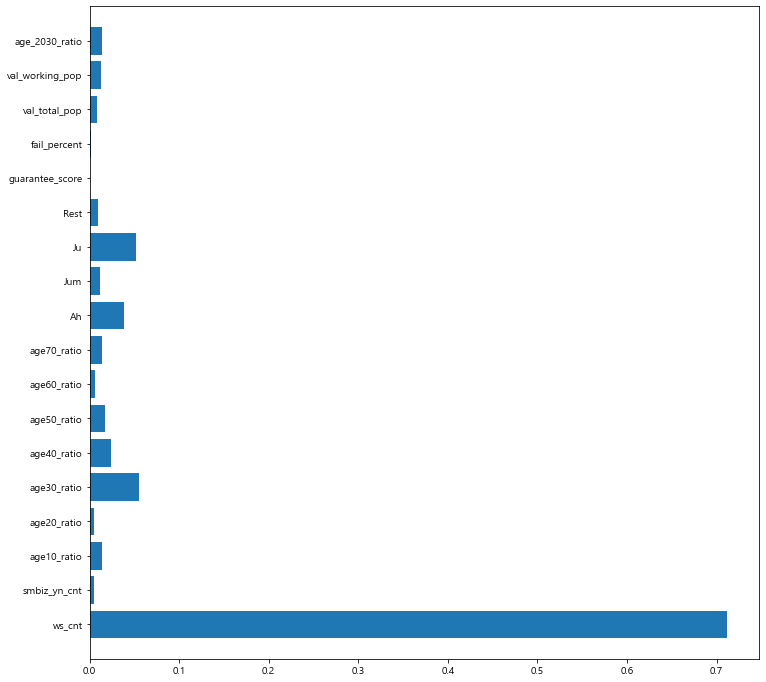

In [131]:
plot_feature_importances(GBR)

# 중분류코드 Q12 (커피점/카페) 격자별로 카운트

### 유동인구가 많고 커피전문점이 적은 지역에 커피전문점 추천하기

In [155]:
yi_1_gid[yi_1_gid['중분류코드'] == 'Q12']

,대분류코드,중분류코드,소분류코드,표준산업분류코드,표준산업분류명,행정동코드,행정동명,도로명주소,경도,위도,gid
69,Q,Q12,Q12A01,I56220,비알콜 음료점업,4146352000,구갈동,경기도 용인시 기흥구 구갈로60번길 1,127.11,37.28,다사65ba20aa
123,Q,Q12,Q12A01,I56220,비알콜 음료점업,4146352000,구갈동,경기도 용인시 기흥구 갈곡로7번길 1-4,127.13,37.27,다사67aa19ab
125,Q,Q12,Q12A01,I56220,비알콜 음료점업,4146353000,상갈동,경기도 용인시 기흥구 민속촌로 90,127.12,37.26,다사66ba17bb
126,Q,Q12,Q12A01,I56220,비알콜 음료점업,4146131000,모현면,경기도 용인시 처인구 모현면 곡현로 837,127.23,37.36,다사76aa28ba
134,Q,Q12,Q12A01,I56220,비알콜 음료점업,4146551000,풍덕천1동,경기도 용인시 수지구 풍덕천로 191,127.10,37.33,다사64ba25ab
...,...,...,...,...,...,...,...,...,...,...,...
39811,Q,Q12,Q12A01,I56220,비알콜 음료점업,4146354000,기흥동,경기도 용인시 기흥구 신고매로 59,127.11,37.22,다사65bb13bb
39832,Q,Q12,Q12A01,I56220,비알콜 음료점업,4146558000,상현2동,경기도 용인시 수지구 만현로 110,127.08,37.31,다사63aa23aa
39862,Q,Q12,Q12A01,I56220,비알콜 음료점업,4146357500,동백2동,경기도 용인시 기흥구 동백죽전대로 341,127.15,37.27,다사69aa19aa
39863,Q,Q12,Q12A01,I56220,비알콜 음료점업,4146356000,구성동,경기도 용인시 기흥구 구성로 103,127.12,37.29,다사66ab21ba


In [12]:
yong_analysis.head(1)

,gid,ws_cnt,smbiz_yn_cnt,age10_ratio,age20_ratio,age30_ratio,age40_ratio,age50_ratio,age60_ratio,age70_ratio,geometry,Ah,Jum,Ju,Rest,total_volume,guarantee_score,fail_percent,high_volume,val_total_pop,val_working_pop
0,다바67bb99aa,1,1,0.00,0.00,0.00,0.00,100.00,0.00,0.00,"MULTIPOLYGON (((127.1371199261711 37.08907145822322, 127.1371091814905 37.09132498599507, 127.1399222378069 37.09133356063069, 127.1399328992012 37.08908003216216, 127.1371199261711 37.08907145822322)))",74.97,61.47,31.07,49.48,256,6.00,0.00,256.00,0.00,0.00


In [20]:
num_coffeeshop = pd.DataFrame(yi_1_gid[yi_1_gid['중분류코드'] == 'Q12'].groupby('gid')['중분류코드'].count(),
                             )

In [21]:
num_coffeeshop.rename(columns={'중분류코드': 'coffee_counts'}, inplace = True)

In [15]:
num_coffeeshop.reset_index(inplace = True)

In [22]:
num_coffeeshop

,coffee_counts
gid,
다바68ba99ab,2
다사59ab29aa,2
다사59ba24bb,1
다사59ba26aa,1
다사59bb25bb,1
...,...
다사88bb02aa,1
다사88bb07ab,8
다사88bb08ba,1


In [16]:
num_coffeeshop = num_coffeeshop.sort_values('coffee_counts', ascending = False)

In [17]:
num_coffeeshop

,gid,coffee_counts
143,다사64aa24bb,30
230,다사65ab24ba,27
231,다사65ab24bb,24
358,다사69aa19bb,23
156,다사64ab25aa,21
...,...,...
373,다사69ab21bb,1
131,다사63bb24ba,1
133,다사63bb25aa,1
134,다사63bb25ba,1


In [224]:
yong_analysis.sort_values('total_pop', ascending = False).head(10)

,gid,ws_cnt,smbiz_yn_cnt,age10_ratio,age20_ratio,age30_ratio,age40_ratio,age50_ratio,age60_ratio,age70_ratio,Ah,Jum,Ju,Rest,total_volume,guarantee_score,fail_percent,high_volume,val_total_pop,val_working_pop,total_fp,age_2030_ratio,coffee_counts
255,다사63aa23bb,9,7,2.38,3.08,16.28,39.90,12.58,11.35,2.53,7945.33,8924.33,8892.28,12246.30,3391,3.56,0.00,376.78,5526.00,3947.00,38008.24,19.36,0.00
699,다사66ab19ab,10,8,0.43,4.45,51.72,36.64,3.11,0.83,1.38,915.57,1107.33,1277.81,1353.40,9055,2.70,0.00,905.50,5510.00,3957.00,4654.11,56.17,1.00
329,다사63bb23bb,66,57,1.58,4.30,18.72,43.74,17.00,4.45,3.30,7860.70,8791.49,11509.10,19791.73,323127,4.73,6.06,4895.86,4299.00,3045.00,47953.02,23.02,2.00
540,다사65aa26ab,32,28,0.27,4.98,28.23,37.26,15.43,6.79,3.20,7045.99,7559.86,9551.24,12957.43,71474,4.91,3.12,2233.56,4011.00,2938.00,37114.52,33.21,1.00
256,다사63aa24aa,43,35,1.04,3.36,30.34,47.72,10.01,2.81,1.54,3744.98,4195.11,4961.66,6892.57,271358,3.47,0.00,6310.65,3901.00,2792.00,19794.32,33.70,2.00
215,다사62ba23ab,11,10,0.44,4.39,12.79,33.11,20.27,5.73,1.80,4016.20,4305.34,5638.81,7256.23,15432,5.18,0.00,1402.91,3581.00,2527.00,21216.58,17.18,2.00
349,다사64aa18bb,46,39,0.32,4.06,27.73,35.14,16.99,7.45,3.58,9959.59,10156.30,11382.55,14100.25,228962,4.89,0.00,4977.43,3480.00,2571.00,45598.69,31.79,2.00
254,다사63aa23ba,7,3,0.40,3.08,31.77,40.88,12.35,4.09,1.83,4913.54,5707.23,6820.36,7676.43,81847,4.43,0.00,11692.43,3281.00,2383.00,25117.56,34.85,1.00
299,다사63ba23ba,6,4,0.14,0.84,18.74,42.93,14.75,6.72,7.28,1821.55,2233.59,2873.68,4184.31,10762,5.17,0.00,1793.67,3266.00,2245.00,11113.13,19.58,1.00
616,다사65ba22ab,1,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1021.88,1193.13,1712.14,1993.94,451,6.00,0.00,451.00,3263.00,2277.00,5921.09,0.00,0.00


In [227]:
yi_1_gid[yi_1_gid['gid'] == '다사66ab19ab']

,대분류코드,중분류코드,소분류코드,표준산업분류코드,표준산업분류명,행정동코드,행정동명,도로명주소,경도,위도,gid
35668,D,D06,D06A05,G47419,"기타 섬유, 직물 및 의복액세서리 소매업",4146352000,구갈동,경기도 용인시 기흥구 기흥역로58번길 56,127.12,37.27,다사66ab19ab
36936,Q,Q12,Q12A01,I56220,비알콜 음료점업,4146352000,구갈동,경기도 용인시 기흥구 기흥역로 63,127.12,37.27,다사66ab19ab
37451,F,F01,F01A01,S96112,두발미용업,4146352000,구갈동,경기도 용인시 기흥구 기흥역로58번길 56,127.12,37.27,다사66ab19ab
38932,F,F13,F13A01,M71531,경영컨설팅업,4146352000,구갈동,경기도 용인시 기흥구 기흥역로58번길 10,127.12,37.27,다사66ab19ab
39246,D,D18,D18A04,G47822,안경 소매업,4146352000,구갈동,경기도 용인시 기흥구 기흥역로 63,127.12,37.27,다사66ab19ab
39522,D,D23,D23A06,G45219,기타 자동차신품 부품 및 내장품 판매업,4146352000,구갈동,경기도 용인시 기흥구 기흥역로58번길 10,127.12,37.27,다사66ab19ab


In [23]:
yong_analysis = pd.merge(yong_analysis, num_coffeeshop, on = 'gid', how='left')

In [24]:
yong_analysis.fillna(0, inplace =True)

In [25]:
yong_analysis.rename(columns={'shop_counts': 'coffee_counts'}, inplace = True)

In [26]:
yong_analysis.head(1)

,gid,ws_cnt,smbiz_yn_cnt,age10_ratio,age20_ratio,age30_ratio,age40_ratio,age50_ratio,age60_ratio,age70_ratio,geometry,Ah,Jum,Ju,Rest,total_volume,guarantee_score,fail_percent,high_volume,val_total_pop,val_working_pop,coffee_counts
0,다바67bb99aa,1,1,0.00,0.00,0.00,0.00,100.00,0.00,0.00,"MULTIPOLYGON (((127.1371199261711 37.08907145822322, 127.1371091814905 37.09132498599507, 127.1399222378069 37.09133356063069, 127.1399328992012 37.08908003216216, 127.1371199261711 37.08907145822322)))",74.97,61.47,31.07,49.48,256,6.00,0.00,256.00,0.00,0.00,0.00


In [4]:
yong_analysis.head(1)

,gid,ws_cnt,smbiz_yn_cnt,age10_ratio,age20_ratio,age30_ratio,age40_ratio,age50_ratio,age60_ratio,age70_ratio,Ah,Jum,Ju,Rest,total_volume,guarantee_score,fail_percent,high_volume,total_pop,working_pop,total_fp,age_2030_ratio,coffee_counts,geometry
0,다바67bb99aa,1,1,0.00,0.00,0.00,0.00,100.00,0.00,0.00,74.97,61.47,31.07,49.48,256,6.00,0.00,256.00,0.00,0.00,216.99,0.00,0.00,"MULTIPOLYGON (((127.1371199261711 37.08907145822322, 127.1371091814905 37.09132498599507, 127.1399222378069 37.09133356063069, 127.1399328992012 37.08908003216216, 127.1371199261711 37.08907145822322)))"


In [8]:
yong_analysis.corrwith(yong_analysis['total_volume'],method='pearson')

ws_cnt            0.83 
smbiz_yn_cnt      0.76 
age10_ratio       0.09 
age20_ratio       0.04 
age30_ratio       -0.01
age40_ratio       0.11 
age50_ratio       0.01 
age60_ratio       -0.02
age70_ratio       0.02 
Ah                0.53 
Jum               0.53 
Ju                0.56 
Rest              0.52 
total_volume      1.00 
guarantee_score   -0.01
fail_percent      0.03 
high_volume       0.24 
val_total_pop     0.21 
val_working_pop   0.22 
total_fp          0.54 
age_2030_ratio    0.01 
coffee_counts     0.73 
dtype: float64

In [4]:
yong_analysis.describe()

,ws_cnt,smbiz_yn_cnt,age10_ratio,age20_ratio,age30_ratio,age40_ratio,age50_ratio,age60_ratio,age70_ratio,Ah,Jum,Ju,Rest,total_volume,guarantee_score,fail_percent,high_volume,val_total_pop,val_working_pop,total_fp,age_2030_ratio,coffee_counts
count,2257.00,2257.00,2257.00,2257.00,2257.00,2257.00,2257.00,2257.00,2257.00,2257.00,2257.00,2257.00,2257.00,2257.00,2257.00,2257.00,2257.00,2257.00,2257.00,2257.00,2257.00,2257.00
mean,10.37,7.40,0.47,6.53,18.58,26.82,18.37,7.21,3.16,2509.72,2672.05,2844.03,3479.09,65159.61,4.62,2.52,6433.63,398.60,286.85,11504.89,25.11,0.73
std,25.68,18.30,1.72,9.39,15.07,16.40,14.02,9.05,5.90,4403.86,4758.27,5312.06,6237.37,200524.87,1.25,9.67,17573.63,696.15,502.62,20584.19,18.00,2.17
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,1.00,0.00,1.40,10.07,18.14,10.67,2.24,0.19,203.54,214.65,158.46,206.75,1303.00,4.00,0.00,799.00,0.00,0.00,795.83,14.33,0.00
50%,3.00,2.00,0.02,4.20,16.34,25.63,17.76,5.75,1.75,952.35,1012.20,905.24,1153.32,8674.00,4.76,0.00,2716.82,37.00,23.00,4011.96,22.33,0.00
75%,7.00,5.00,0.34,7.78,23.20,33.67,23.02,9.35,3.80,2906.52,3124.35,3319.86,4061.94,44537.00,6.00,0.00,6344.62,472.00,347.00,13447.39,33.09,1.00
max,325.00,219.00,33.33,100.00,100.00,100.00,100.00,100.00,100.00,63686.72,60330.93,73101.26,86754.03,4964721.00,6.00,100.00,399142.00,5526.00,3957.00,283872.94,100.00,30.00


In [20]:
a =yong_analysis['ws_cnt'].quantile(0.8) # 상위 20프로

In [21]:
len(yong_analysis.loc[yong_analysis['ws_cnt'] >= a])

470

# 드라이브 쓰루세차장과 커피숍에 최적인 격자 찾기

In [24]:
yong_analysis.head(3)

,gid,ws_cnt,smbiz_yn_cnt,age10_ratio,age20_ratio,age30_ratio,age40_ratio,age50_ratio,age60_ratio,age70_ratio,Ah,Jum,Ju,Rest,total_volume,guarantee_score,fail_percent,val_total_pop,val_working_pop,total_fp,age_2030_ratio,coffee_counts
0,다바67bb99aa,1,1,0.00,0.00,0.00,0.00,100.00,0.00,0.00,74.97,61.47,31.07,49.48,256,6.00,0.00,0.00,0.00,216.99,0.00,0.00
1,다바68aa99ba,1,0,0.17,3.50,9.58,15.83,14.50,2.08,0.00,514.30,596.30,403.66,444.72,7312,4.00,0.00,0.00,0.00,1958.98,13.08,0.00
2,다바68aa99bb,5,3,0.16,2.66,13.79,21.39,13.11,2.16,2.55,182.42,211.31,140.92,156.78,37466,5.20,0.00,6.00,0.00,691.43,16.45,0.00


In [29]:
yong_analysis.rename(columns={'val_total_pop':'total_pop', 'val_working_pop':'working_pop'}, inplace = True)

In [29]:
yong_analysis.sort_values('total_fp', ascending = False).head(10)

,gid,ws_cnt,smbiz_yn_cnt,age10_ratio,age20_ratio,age30_ratio,age40_ratio,age50_ratio,age60_ratio,age70_ratio,Ah,Jum,Ju,Rest,total_volume,guarantee_score,fail_percent,total_pop,working_pop,total_fp,age_2030_ratio,coffee_counts
525,다사65aa22ab,54,37,0.22,4.94,16.06,34.52,22.78,9.66,7.72,63686.72,60330.93,73101.26,86754.03,301663,4.96,1.85,0.00,0.00,283872.94,21.00,4.00
362,다사64aa24bb,325,159,3.14,7.61,13.94,42.39,19.26,4.82,4.44,52232.12,53899.66,64148.28,64338.82,4964721,4.76,4.31,476.00,404.00,234618.88,21.55,30.00
485,다사64bb25aa,22,14,0.74,11.29,14.63,24.03,17.69,8.64,3.78,46276.44,59536.63,60958.96,61182.29,193805,4.95,0.00,0.00,0.00,227954.32,25.92,0.00
527,다사65aa22bb,12,8,0.30,5.94,19.90,34.88,19.49,7.01,5.94,41970.28,46074.67,51212.16,63361.45,108013,4.67,0.00,324.00,232.00,202618.56,25.84,1.00
535,다사65aa25aa,16,13,0.17,6.74,23.27,25.24,22.68,8.99,6.22,41063.67,52235.56,54141.63,52338.49,101035,4.75,0.00,91.00,76.00,199779.35,30.01,1.00
470,다사64bb19aa,8,5,0.21,10.52,17.66,16.95,17.07,5.72,12.81,41161.92,38885.53,43218.03,60416.45,22172,4.25,12.50,230.00,189.00,183681.93,28.18,3.00
583,다사65ab24ba,131,79,2.03,17.24,20.05,27.28,15.49,4.12,2.02,32851.77,36962.63,43997.98,47004.07,864256,3.94,3.82,1065.00,802.00,160816.45,37.29,27.00
124,다사61bb22aa,253,156,1.21,9.12,25.20,35.01,15.16,4.19,1.64,33424.92,32683.46,43741.51,50225.30,2282297,3.96,6.72,1630.00,1288.00,160075.19,34.32,17.00
374,다사64ab13bb,21,13,0.16,4.39,19.35,23.37,15.81,4.80,1.74,34682.61,36099.36,40075.04,47544.02,159156,5.33,0.00,17.00,15.00,158401.03,23.74,3.00
585,다사65ab25aa,17,8,0.68,7.10,30.02,31.56,16.42,5.18,2.97,27499.62,42834.27,39368.21,33370.21,263765,4.94,0.00,0.00,0.00,143072.31,37.12,16.00


In [88]:
yi_1_gid[yi_1_gid['gid'] == '다사64bb25aa']

,대분류코드,중분류코드,소분류코드,표준산업분류코드,표준산업분류명,행정동코드,행정동명,도로명주소,경도,위도,gid
1,Q,Q01,Q01A08,I56111,한식 음식점업,4146551000,풍덕천1동,경기도 용인시 수지구 풍덕천로190번길 23,127.10,37.32,다사64bb25aa
207,D,D03,D03A01,G47122,체인화 편의점,4146551000,풍덕천1동,경기도 용인시 수지구 풍덕천로190번길 25,127.10,37.32,다사64bb25aa
418,Q,Q10,Q10A09,I56111,한식 음식점업,4146551000,풍덕천1동,경기도 용인시 수지구 풍덕천로190번길 23,127.10,37.32,다사64bb25aa
1111,F,F05,F05A02,NaN,NaN,4146551000,풍덕천1동,경기도 용인시 수지구 풍덕천로190번길 25,127.10,37.32,다사64bb25aa
4138,Q,Q01,Q01A01,I56111,한식 음식점업,4146551000,풍덕천1동,경기도 용인시 수지구 풍덕천로190번길 23,127.10,37.32,다사64bb25aa
5997,F,F14,F14A01,NaN,NaN,4146551000,풍덕천1동,경기도 용인시 수지구 풍덕천로190번길 15-4,127.10,37.33,다사64bb25aa
7071,F,F15,F15A02,NaN,NaN,4146551000,풍덕천1동,경기도 용인시 수지구 포은대로 482-2,127.10,37.32,다사64bb25aa
7568,D,D21,D21A06,G47511,철물 및 난방용구 소매업,4146551000,풍덕천1동,경기도 용인시 수지구 풍덕천로190번길 25,127.10,37.32,다사64bb25aa
12746,L,L01,L01A01,L68221,부동산 자문 및 중개업,4146551000,풍덕천1동,경기도 용인시 수지구 신수로 615,127.10,37.32,다사64bb25aa
14265,F,F14,F14A01,NaN,NaN,4146551000,풍덕천1동,경기도 용인시 수지구 풍덕천로190번길 15,127.10,37.33,다사64bb25aa


In [44]:
yongsales = pd.read_csv('../data/yongsales.csv')

In [45]:
yongsales.head(1)

,Unnamed: 0,gid,ws_cnt,found_age_1,found_age_2,found_age_3,found_age_4,found_age_5,found_age_6,runout_cnt,smbiz_yn_cnt,rpr_per_gender_m,rpr_per_gender_f,rpr_per_age_bin_10,rpr_per_age_bin_20,rpr_per_age_bin_30to50,rpr_per_age_bin_50over,sme_loan_cnt,sme_loan_y_1,sme_loan_y_2,sme_loan_y_3,sme_loan_y_4,sme_loan_y_5,sme_loan_y_6,sales_est_amt_201703,sales_est_amt_201706,sales_est_amt_201709,sales_est_amt_201712,sales_est_amt_201803,sales_est_amt_201806,sales_est_amt_201809,sales_est_amt_201812,sales_est_amt_201903,sales_est_amt_201906,sales_est_amt_201909,sales_est_amt_201912,sales_est_amt_202003,sales_est_amt_202006,sales_est_amt_202009,age10_ratio,age20_ratio,age30_ratio,age40_ratio,age50_ratio,age60_ratio,age70_ratio,indcd_a_yn,indcd_b_yn,indcd_c_yn,indcd_d_yn,indcd_e_yn,indcd_f_yn,indcd_g_yn,indcd_h_yn,indcd_i_yn,indcd_j_yn,indcd_k_yn,indcd_l_yn,indcd_m_yn,indcd_n_yn,indcd_o_yn,indcd_p_yn,indcd_q_yn,indcd_r_yn,indcd_s_yn,indcd_t_yn,indcd_u_yn,geometry,coordinates,Ah,Jum,Ju,Rest
0,0,다바67bb99aa,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57,0,199,0.00,0.00,0.00,0.00,100.00,0.00,0.00,NaN,nan,NaN,NaN,nan,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,nan,"MULTIPOLYGON (((127.1371199261711 37.08907145822322, 127.1371091814905 37.09132498599507, 127.1399222378069 37.09133356063069, 127.1399328992012 37.08908003216216, 127.1371199261711 37.08907145822322)))","[[127.13711992617105, 37.08907145822322], [127.13710918149052, 37.09132498599507], [127.13992223780687, 37.09133356063069], [127.13993289920121, 37.08908003216216]]",74.97,61.47,31.07,49.48
